#  Urban Bike Ridership and Path Planning: München Weather Impact

Analyzing the Impact of Weather on Urban Bicycle Traffic and Identifying Seasonal Trends: München Case Study


## Data Sources

### Datasetsource 1: Fahrrad-Dauerzählerstellen München

- **Metadata URL:** [Link](https://www.govdata.de/web/guest/suchen/-/details/daten-der-raddauerzahlstellen-munchen-2023)
- **Data URL:** [Link](https://opendata.muenchen.de/dataset/022a11ff-4dcb-4f03-b7dd-a6c94a094587/resource/86962013-4854-4deb-aaf9-36e3770cde24/download/rad_2012_15min_06_06_23_r.csv)
- **Data Type:** CSV

### Datasetsource 2: Meteostat Munich Weather Data

- **Metadata URL:** [Link](https://meteostat.net/de/place/de/munich?s=10865&t=2023-10-14/2023-10-21)
- **Data URL:** [Link](https://meteostat.net/de/place/de/munich?s=10865&t=2023-10-14/2023-10-21)
- **Data Type:** CSV


## Questions

The report explores the correlation between weather conditions and daily bicycle ridership in München, addressing two key questions:

1. How do weather conditions impact daily bicycle ridership in München, and can weather-related patterns be identified?
2. How can the analysis insights guide bike path planning in München, considering seasonal trends in bicycle usage?



## Outline
1. Install required dependencies
2. Load the preprocessed data
3. Data exploration
4. Conclusion
5. Finding
6. Outlook
7. Problem


### 1. Install required dependencies
Initially, install all required dependencies. We use requirements.txt to manage dependencies.

In [34]:
%%capture
%pip install -r requirements.txt

### 2. Load data

Generate two pandas dataframes by extracting data from two tables within a local SQLite file.

In [116]:
import pandas as pd
df1 = pd.read_sql_table('dataset1', 'sqlite:////Users/miro/PycharmProjects/made-template/data/data/dataset1.sqlite')
df2 = pd.read_sql_table('dataset2', 'sqlite:////Users/miro/PycharmProjects/made-template/data/data/dataset2.sqlite')

### 3. Data exploration

Before going deeper into the topic, first the two chosen datasets get inspected briefly.

#### Dataset 1: Bikers in Munch

##### Dataset1: Overview

This dataset captures daily bike counts in central Munich

##### Dataset 1: Example

Below, the initial ten rows of dataset 1 are provided as an example.

In [118]:
df1.head(7)

Date  Total bikers  Bikers inward  Bikers outward
0 2011-01-01         115.0           91.0           206.0
1 2011-01-02         136.0          109.0           245.0
2 2011-01-03          52.0           29.0            81.0
3 2011-01-04          23.0           14.0            37.0
4 2011-01-05          33.0           18.0            51.0
5 2011-01-06          57.0           25.0            82.0
6 2011-01-07         135.0          126.0           261.0

In [4]:
df1.columns

Index(['datum', 'richtung_1', 'richtung_2', 'gesamt'], dtype='object')

In [117]:
df1

Date  Total bikers  Bikers inward  Bikers outward
0   2011-01-01         115.0           91.0           206.0
1   2011-01-02         136.0          109.0           245.0
2   2011-01-03          52.0           29.0            81.0
3   2011-01-04          23.0           14.0            37.0
4   2011-01-05          33.0           18.0            51.0
..         ...           ...            ...             ...
360 2011-12-27        1581.0         1287.0          2868.0
361 2011-12-28        1761.0         1364.0          3125.0
362 2011-12-29        1442.0         1170.0          2612.0
363 2011-12-30        1138.0          915.0          2053.0
364 2011-12-31         546.0          466.0          1012.0

[365 rows x 4 columns]

#### Dataset 2: Meteostat Munich Weather Data

##### Dataset 2: Overview

This dataset provides daily weather information, including average temperature, total rainfall, and duration of sunshine, from a central weather station. Other attributes are excluded due to either difficulty in correlation or lack of relevance for the project.

##### Dataset 2: Example

In [119]:
df2.head(8)

Average temperature  Min temperature  Max temperature  Total rainfall  \
0                  9.1              6.9             12.0             0.2   
1                  7.9              5.3             11.9             0.9   
2                  5.9              3.4              9.7             2.4   
3                  5.5              1.7             10.7             3.8   
4                  4.5              1.0              7.4             8.1   
5                  1.6              0.1              2.6             2.3   
6                  2.4              1.2              3.8            11.1   
7                  2.1              0.4              3.4             3.8   

   Snow-level  Wind-direction  Wind-speed  Lace boe  Air pressure  \
0         0.0           244.0        14.0      40.0        1017.6   
1         0.0           220.0        13.0      54.7        1014.6   
2         0.0           232.0        13.3      56.9        1022.0   
3         0.0           263.0        24.1      67.3        1018.4   
4         0.0           252.0        32.4     100.4        1001.6   
5         0.0           286.0        22.3      65.2        1014.0   
6         0.0           262.0        23.4      62.3        1020.6   
7        10.0           276.0        16.6      46.1        1021.3   

   Duration of sunshine  
0                  60.0  
1                   0.0  
2                 462.0  
3                  24.0  
4                   0.0  
5                   6.0  
6                   0.0  
7                   0.0

In [120]:
df2.columns

Index(['Average temperature', 'Min temperature', 'Max temperature',
       'Total rainfall', 'Snow-level', 'Wind-direction', 'Wind-speed',
       'Lace boe', 'Air pressure', 'Duration of sunshine'],
      dtype='object')

In the following, the first ten rows of dataset 2 are shown exemplary.

In [10]:
df2.head()

Average temperature  Min temperature  Max temperature  Total rainfall  \
0                  9.1              6.9             12.0             0.2   
1                  7.9              5.3             11.9             0.9   
2                  5.9              3.4              9.7             2.4   
3                  5.5              1.7             10.7             3.8   
4                  4.5              1.0              7.4             8.1   

   Snow-level  Wind-direction  Wind-speed  Lace boe  Air pressure  \
0         0.0           244.0        14.0      40.0        1017.6   
1         0.0           220.0        13.0      54.7        1014.6   
2         0.0           232.0        13.3      56.9        1022.0   
3         0.0           263.0        24.1      67.3        1018.4   
4         0.0           252.0        32.4     100.4        1001.6   

   Duration of sunshine  
0                  60.0  
1                   0.0  
2                 462.0  
3                  24.0  
4                   0.0

#### Combined Dataset

##### Merging the datasets

For efficient analysis and visualization, 'dataset1' and 'dataset2' are merged. This approach combines information from both datasets, aiding in the exploration of potential correlations. The unified dataset facilitates a holistic understanding, enhancing the ability to uncover insights that may be less apparent when analyzing the datasets independently.

In [23]:
merged_df = pd.concat([df1,df2],axis=1)
merged_df

Date  Total bikers  Bikers inward  Bikers outward  \
0   2011-01-01         115.0           91.0           206.0   
1   2011-01-02         136.0          109.0           245.0   
2   2011-01-03          52.0           29.0            81.0   
3   2011-01-04          23.0           14.0            37.0   
4   2011-01-05          33.0           18.0            51.0   
..         ...           ...            ...             ...   
361 2011-12-28        1761.0         1364.0          3125.0   
362 2011-12-29        1442.0         1170.0          2612.0   
363 2011-12-30        1138.0          915.0          2053.0   
364 2011-12-31         546.0          466.0          1012.0   
365        NaT           NaN            NaN             NaN   

     Average temperature  Min temperature  Max temperature  Total rainfall  \
0                    9.1              6.9             12.0             0.2   
1                    7.9              5.3             11.9             0.9   
2                    5.9              3.4              9.7             2.4   
3                    5.5              1.7             10.7             3.8   
4                    4.5              1.0              7.4             8.1   
..                   ...              ...              ...             ...   
361                  7.6              5.6              9.5             5.8   
362                  4.0              1.7              6.3             3.8   
363                  4.2              0.4              9.4             0.0   
364                  6.5              1.3              9.5             0.0   
365                  4.8              0.0              8.0             0.0   

     Snow-level  Wind-direction  Wind-speed  Lace boe  Air pressure  \
0           0.0           244.0        14.0      40.0        1017.6   
1           0.0           220.0        13.0      54.7        1014.6   
2           0.0           232.0        13.3      56.9        1022.0   
3           0.0           263.0        24.1      67.3        1018.4   
4           0.0           252.0        32.4     100.4        1001.6   
..          ...             ...         ...       ...           ...   
361         0.0           245.0        20.5      65.2        1011.9   
362         0.0           254.0        14.4      56.5        1026.3   
363         0.0           143.0         8.3      22.3        1023.1   
364         0.0           243.0        16.6      57.6        1022.4   
365         0.0           199.0         9.7      33.1        1022.0   

     Duration of sunshine  
0                    60.0  
1                     0.0  
2                   462.0  
3                    24.0  
4                     0.0  
..                    ...  
361                   0.0  
362                  12.0  
363                 354.0  
364                 216.0  
365                 204.0  

[366 rows x 14 columns]

##### Overall dataset: Example

In the following, the first ten rows of the new combined dataset are shown examplarily.

In [24]:
merged_df.head(8)

Date  Total bikers  Bikers inward  Bikers outward  \
0 2011-01-01         115.0           91.0           206.0   
1 2011-01-02         136.0          109.0           245.0   
2 2011-01-03          52.0           29.0            81.0   
3 2011-01-04          23.0           14.0            37.0   
4 2011-01-05          33.0           18.0            51.0   
5 2011-01-06          57.0           25.0            82.0   
6 2011-01-07         135.0          126.0           261.0   
7 2011-01-08         232.0          238.0           470.0   

   Average temperature  Min temperature  Max temperature  Total rainfall  \
0                  9.1              6.9             12.0             0.2   
1                  7.9              5.3             11.9             0.9   
2                  5.9              3.4              9.7             2.4   
3                  5.5              1.7             10.7             3.8   
4                  4.5              1.0              7.4             8.1   
5                  1.6              0.1              2.6             2.3   
6                  2.4              1.2              3.8            11.1   
7                  2.1              0.4              3.4             3.8   

   Snow-level  Wind-direction  Wind-speed  Lace boe  Air pressure  \
0         0.0           244.0        14.0      40.0        1017.6   
1         0.0           220.0        13.0      54.7        1014.6   
2         0.0           232.0        13.3      56.9        1022.0   
3         0.0           263.0        24.1      67.3        1018.4   
4         0.0           252.0        32.4     100.4        1001.6   
5         0.0           286.0        22.3      65.2        1014.0   
6         0.0           262.0        23.4      62.3        1020.6   
7        10.0           276.0        16.6      46.1        1021.3   

   Duration of sunshine  
0                  60.0  
1                   0.0  
2                 462.0  
3                  24.0  
4                   0.0  
5                   6.0  
6                   0.0  
7                   0.0

In [25]:
print(merged_df.shape)
print(merged_df.size)

(366, 14)
5124


In [26]:
merged_df['Snow-level'].fillna(merged_df['Snow-level'].mean(),inplace=True)

In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 364
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  364 non-null    datetime64[ns]
 1   Total bikers          364 non-null    float64       
 2   Bikers inward         364 non-null    float64       
 3   Bikers outward        364 non-null    float64       
 4   Average temperature   364 non-null    float64       
 5   Min temperature       364 non-null    float64       
 6   Max temperature       364 non-null    float64       
 7   Total rainfall        364 non-null    float64       
 8   Snow-level            364 non-null    float64       
 9   Wind-direction        364 non-null    float64       
 10  Wind-speed            364 non-null    float64       
 11  Lace boe              364 non-null    float64       
 12  Air pressure          364 non-null    float64       
 13  Duration of sunshine  364

In [31]:
merged_df.describe()

Date  Total bikers  Bikers inward  \
count                            364    364.000000     364.000000   
mean   2011-07-02 06:27:41.538461440   3102.189560    2462.439560   
min              2011-01-01 00:00:00     23.000000      14.000000   
25%              2011-04-02 18:00:00   1308.750000     880.750000   
50%              2011-07-02 12:00:00   2629.000000    1802.000000   
75%              2011-10-01 06:00:00   4401.500000    3666.750000   
max              2011-12-31 00:00:00  10380.000000    8950.000000   
std                              NaN   2238.601385    1997.340383   

       Bikers outward  Average temperature  Min temperature  Max temperature  \
count      364.000000           364.000000       364.000000       364.000000   
mean      5564.629121            10.215110         6.072527        14.715385   
min         37.000000           -12.600000       -16.600000        -9.700000   
25%       2183.500000             4.750000         1.275000         7.675000   
50%       4418.000000            10.400000         6.100000        15.350000   
75%       7958.500000            17.300000        11.900000        22.525000   
max      19330.000000            26.500000        20.400000        34.700000   
std       4225.078644             8.310418         7.316408         9.671416   

       Total rainfall  Snow-level  Wind-direction  Wind-speed    Lace boe  \
count      364.000000  364.000000      364.000000  364.000000  364.000000   
mean         2.647253   16.144560      193.401099   10.190934   35.326374   
min          0.000000    0.000000        0.000000    4.300000   11.900000   
25%          0.000000    0.000000       97.000000    7.200000   24.100000   
50%          0.200000   16.056338      228.500000    9.400000   32.400000   
75%          2.825000   16.056338      267.000000   11.500000   43.900000   
max         46.300000  200.000000      359.000000   32.400000  100.400000   
std          5.419048   28.467220       94.280623    4.170214   14.326660   

       Air pressure  Duration of sunshine  
count    364.000000            364.000000  
mean    1017.066484            311.934066  
min      993.200000              0.000000  
25%     1011.800000             36.000000  
50%     1016.800000            288.000000  
75%     1022.250000            534.000000  
max     1037.800000            912.000000  
std        8.181281            272.264691

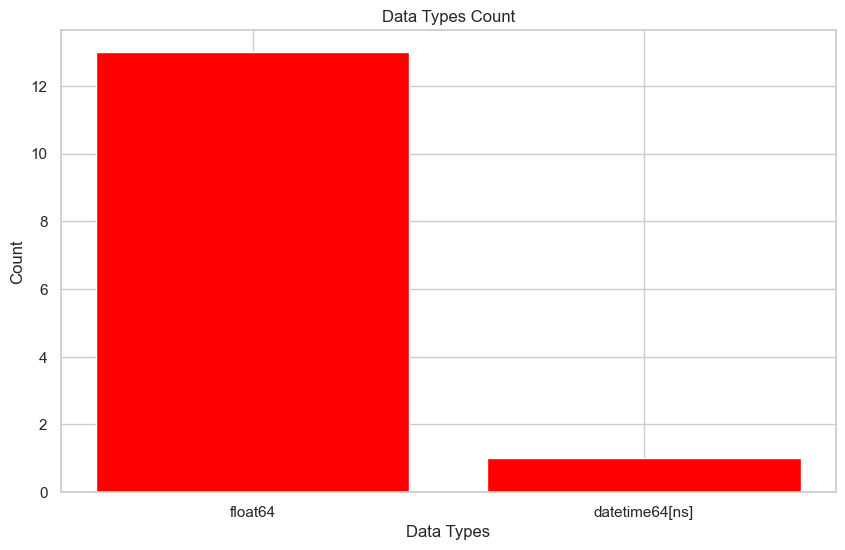

In [158]:
import matplotlib.pyplot as plt

x = merged_df.dtypes.value_counts().index.astype(str).tolist()
y = merged_df.dtypes.value_counts().tolist()
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='red')
plt.xlabel("Data Types")
plt.ylabel("Count")
plt.title("Data Types Count")
plt.savefig("data_types_count_static.png")
plt.show()


In [157]:
merged_df.corr()

Date  Total bikers  Bikers inward  Bikers outward  \
Date                  1.000000      0.511188       0.550229        0.530958   
Total bikers          0.511188      1.000000       0.989722        0.997712   
Bikers inward         0.550229      0.989722       1.000000        0.997125   
Bikers outward        0.530958      0.997712       0.997125        1.000000   
Average temperature   0.203495      0.532916       0.490605        0.514285   
Min temperature       0.238046      0.532551       0.496767        0.517004   
Max temperature       0.174005      0.522781       0.476862        0.502417   
Total rainfall        0.040610      0.084737       0.076816        0.081210   
Snow-level           -0.121597     -0.115867      -0.109069       -0.112951   
Wind-direction       -0.065782     -0.054748      -0.071885       -0.062990   
Wind-speed           -0.209866     -0.300947      -0.287661       -0.295440   
Lace boe             -0.139014     -0.133954      -0.136394       -0.135452   
Air pressure         -0.317630     -0.235992      -0.213528       -0.225979   
Duration of sunshine -0.047962      0.210296       0.174111        0.193731   

                      Average temperature  Min temperature  Max temperature  \
Date                             0.203495         0.238046         0.174005   
Total bikers                     0.532916         0.532551         0.522781   
Bikers inward                    0.490605         0.496767         0.476862   
Bikers outward                   0.514285         0.517004         0.502417   
Average temperature              1.000000         0.967914         0.983943   
Min temperature                  0.967914         1.000000         0.917622   
Max temperature                  0.983943         0.917622         1.000000   
Total rainfall                   0.133369         0.176092         0.113298   
Snow-level                      -0.307498        -0.328098        -0.292238   
Wind-direction                   0.050611         0.091187         0.023935   
Wind-speed                      -0.123150        -0.087531        -0.162630   
Lace boe                         0.129043         0.141347         0.108026   
Air pressure                    -0.353913        -0.371812        -0.333036   
Duration of sunshine             0.481142         0.305993         0.586489   

                      Total rainfall  Snow-level  Wind-direction  Wind-speed  \
Date                        0.040610   -0.121597       -0.065782   -0.209866   
Total bikers                0.084737   -0.115867       -0.054748   -0.300947   
Bikers inward               0.076816   -0.109069       -0.071885   -0.287661   
Bikers outward              0.081210   -0.112951       -0.062990   -0.295440   
Average temperature         0.133369   -0.307498        0.050611   -0.123150   
Min temperature             0.176092   -0.328098        0.091187   -0.087531   
Max temperature             0.113298   -0.292238        0.023935   -0.162630   
Total rainfall              1.000000   -0.025544        0.214450    0.138750   
Snow-level                 -0.025544    1.000000       -0.004731    0.072205   
Wind-direction              0.214450   -0.004731        1.000000    0.273536   
Wind-speed                  0.138750    0.072205        0.273536    1.000000   
Lace boe                    0.312636   -0.011727        0.331869    0.805053   
Air pressure               -0.234681    0.167270       -0.061680   -0.121247   
Duration of sunshine       -0.188721   -0.065498       -0.184483   -0.258190   

                      Lace boe  Air pressure  Duration of sunshine  
Date                 -0.139014     -0.317630             -0.047962  
Total bikers         -0.133954     -0.235992              0.210296  
Bikers inward        -0.136394     -0.213528              0.174111  
Bikers outward       -0.135452     -0.225979              0.193731  
Average temperature   0.129043     -0.353913              0.481142  
Min temperature       0.141347     -0.3

### Correlation Matrix

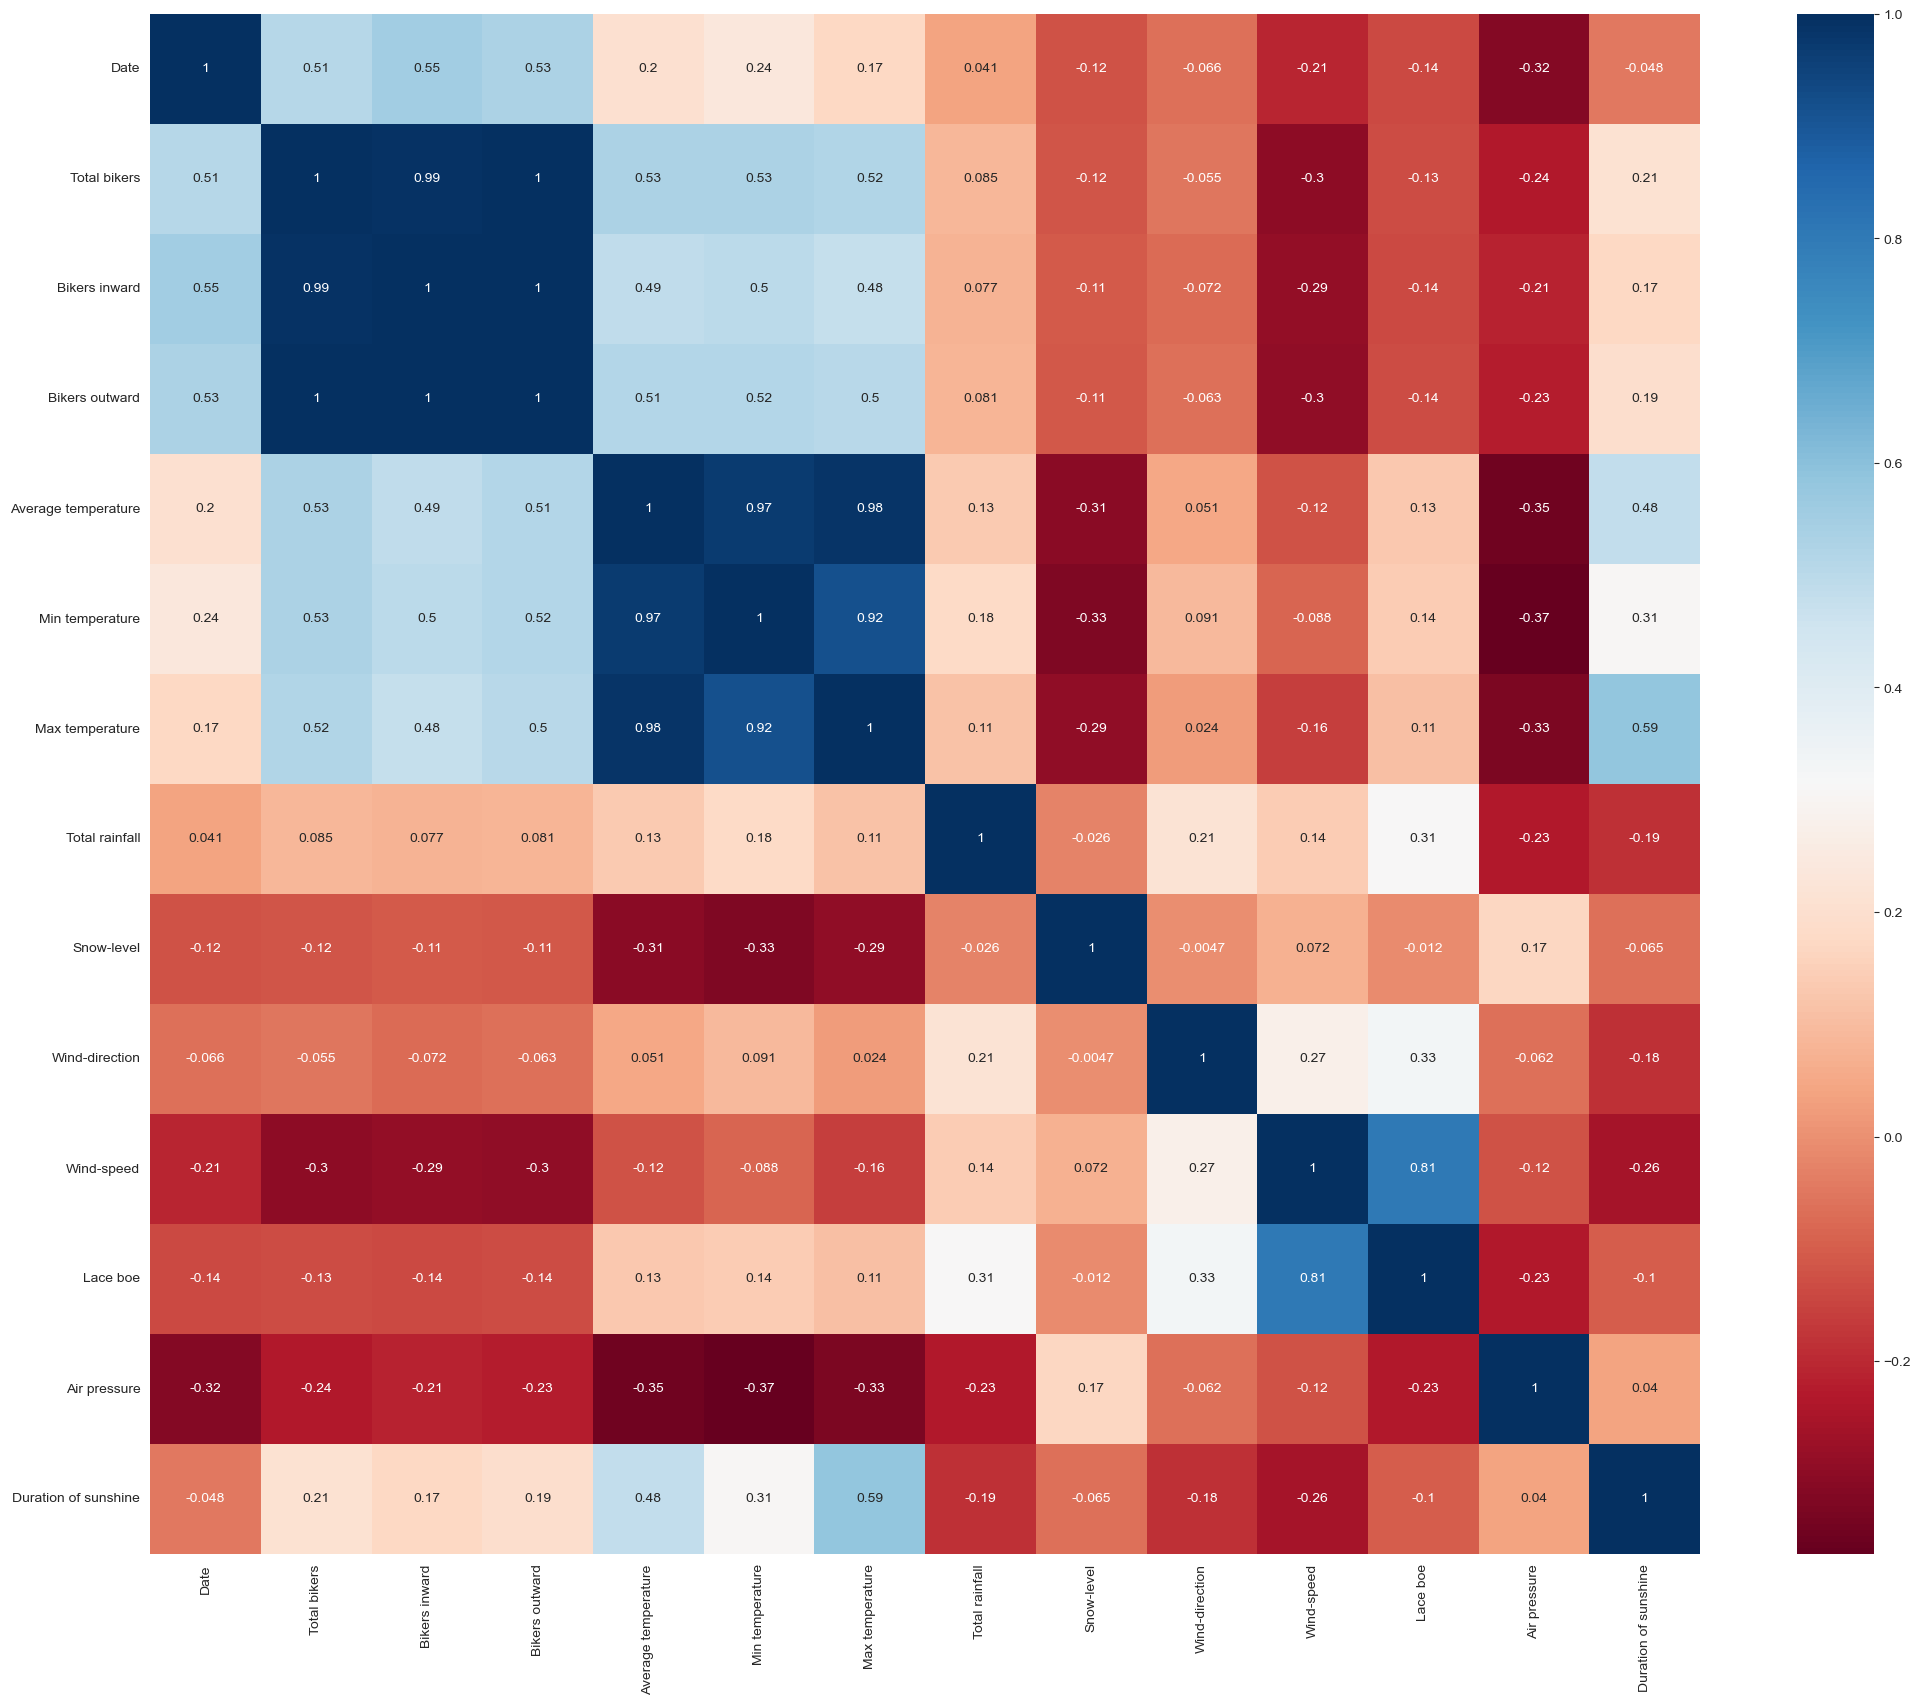

In [41]:
plt.figure(figsize = (25,20))
sns.heatmap(merged_df.corr(), annot = True, cmap="RdBu")
plt.show()

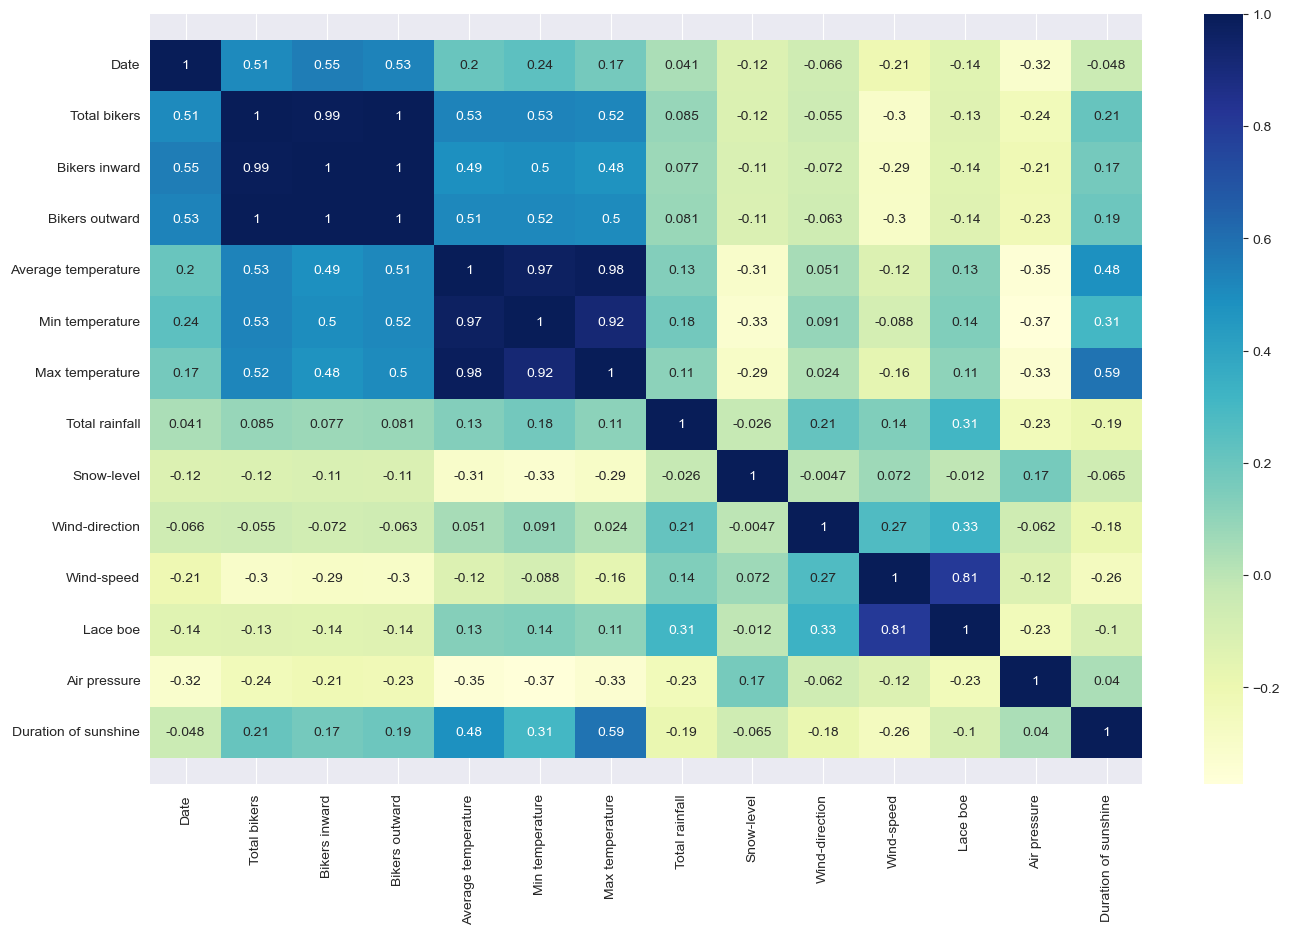

In [42]:
plt.figure(figsize = (16, 10))
cor=merged_df.corr()
ax=sns.heatmap(cor, annot = True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

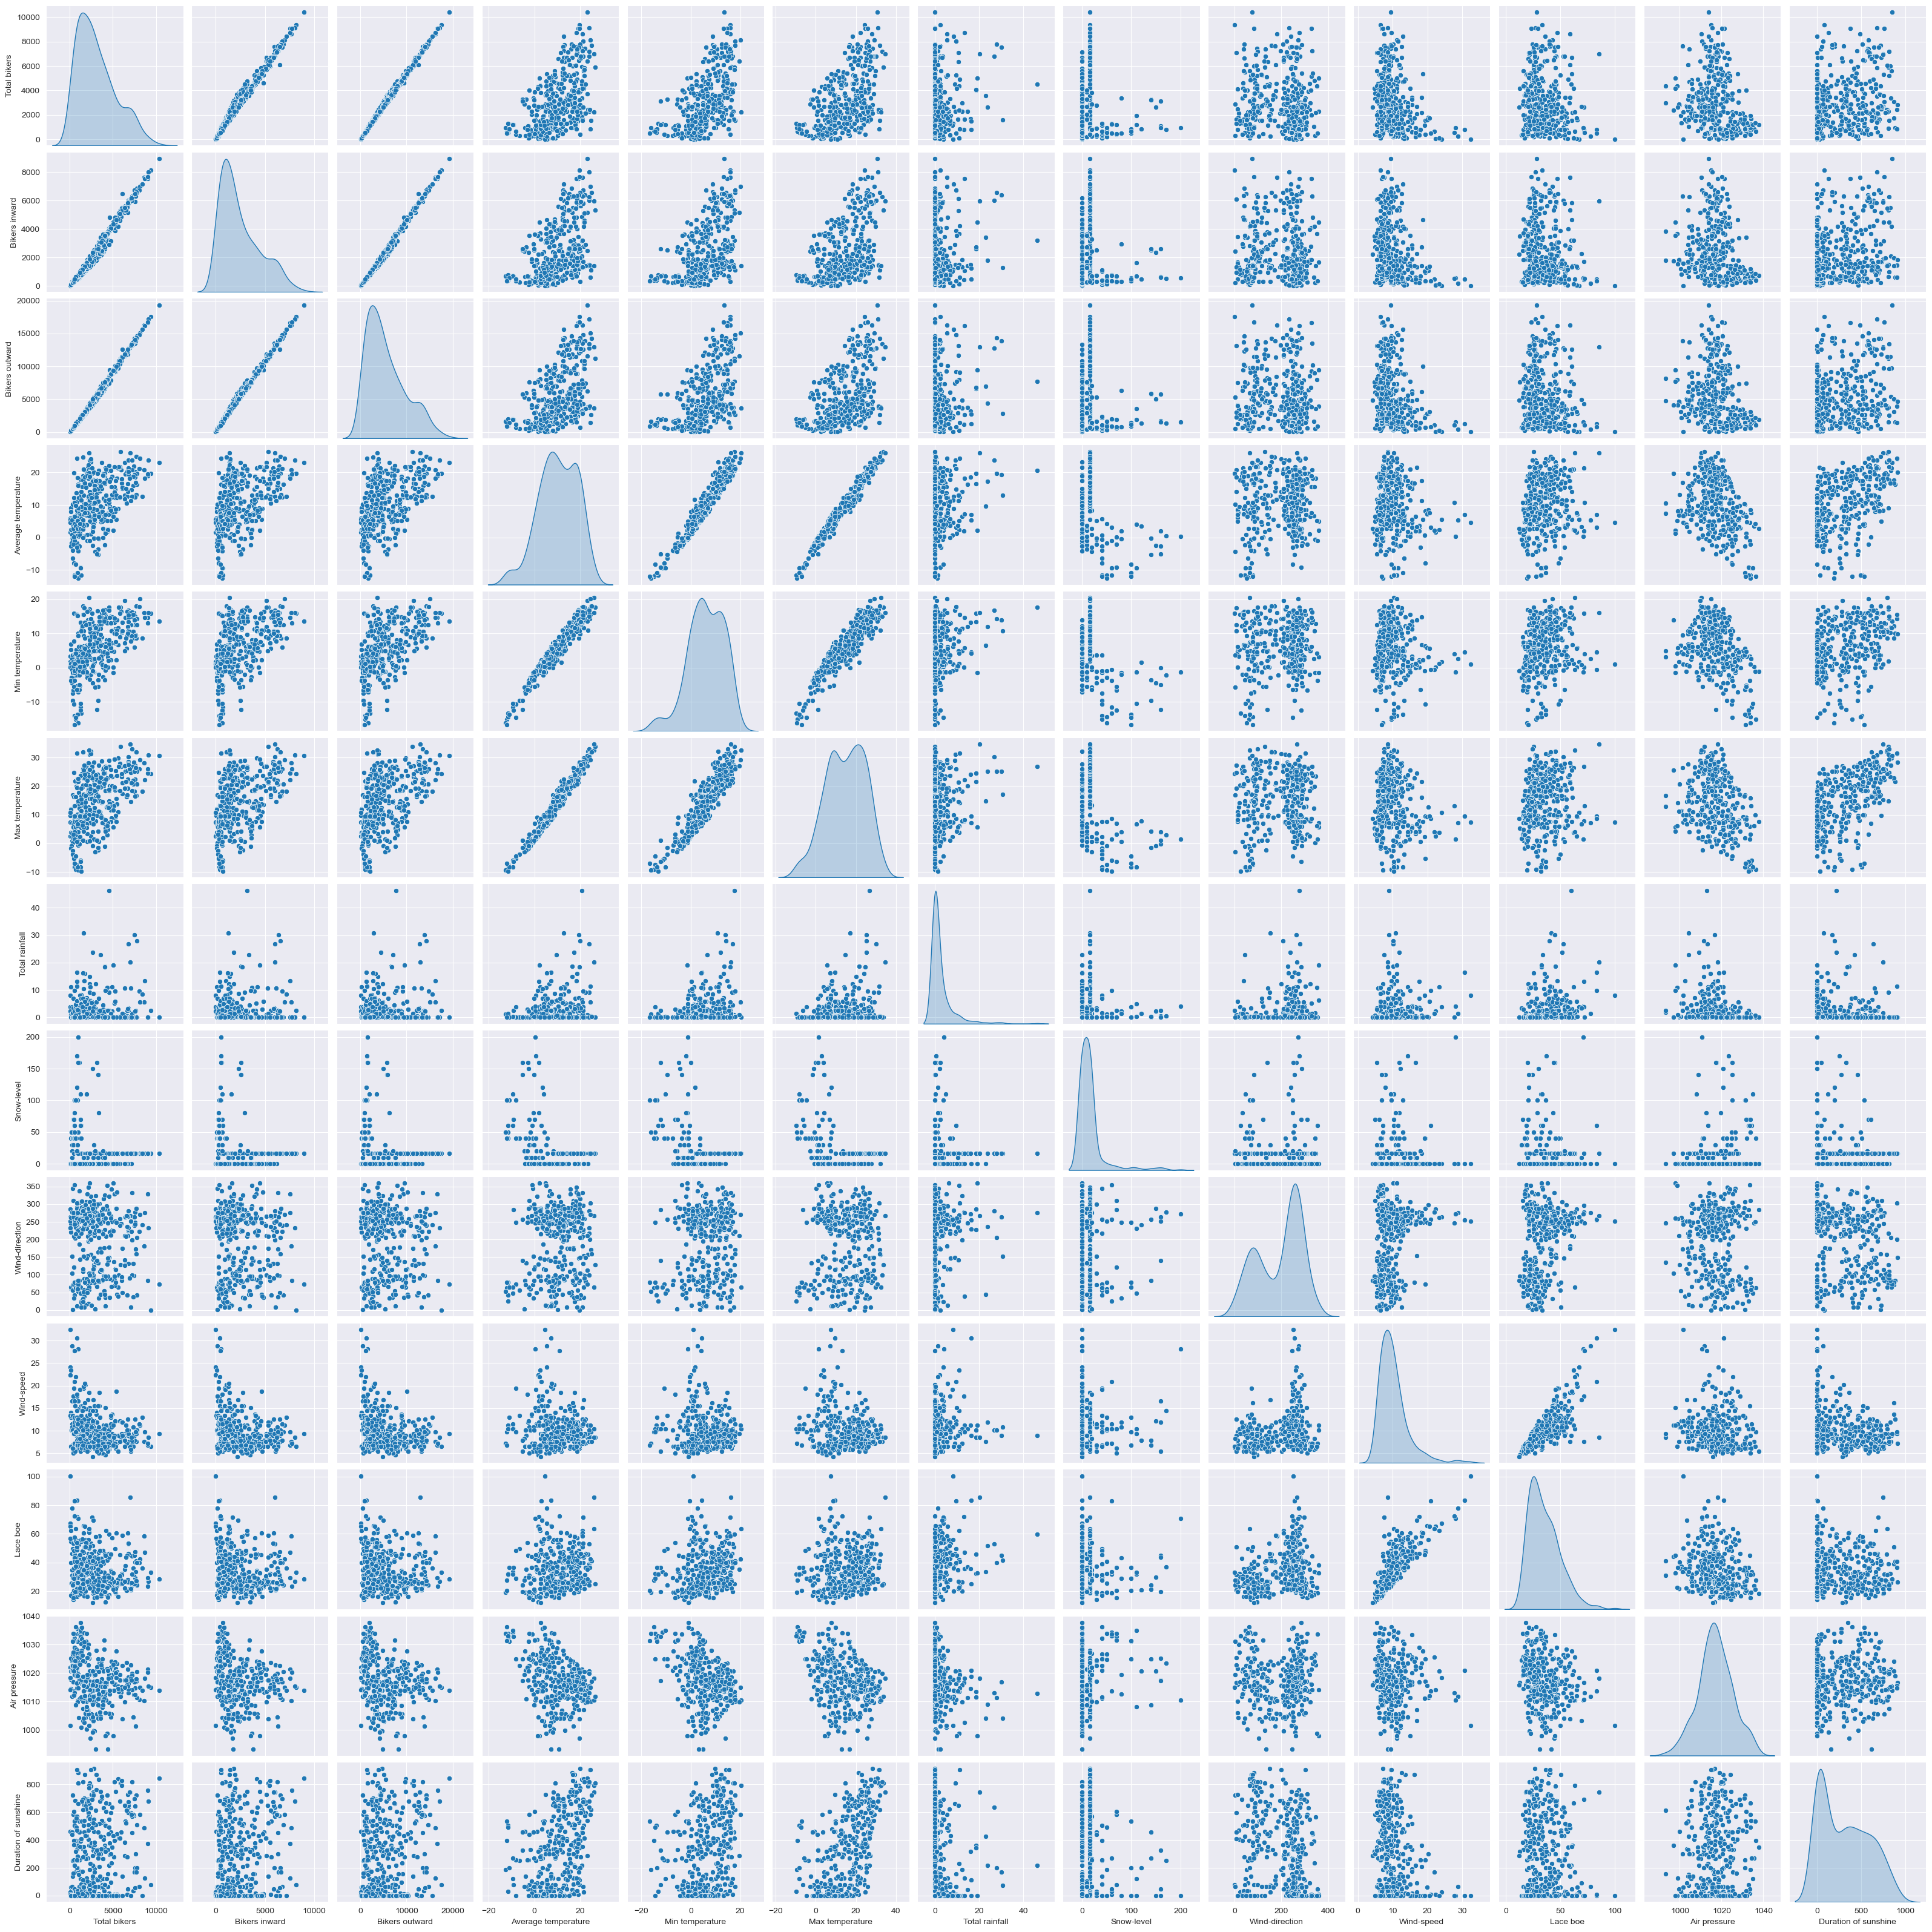

In [43]:
sns.pairplot(merged_df, diag_kind='kde')
plt.show()

### Findings

Following the initial exploration of the two datasets, a detailed examination of various attributes is conducted. Specifically, the analysis focuses on key factors such as average temperature, total rainfall, and duration of sunshine, aiming to establish correlations with the total number of bikers.

#### Temperature and the amount of bikers

In this segment, we scrutinize the relationship between temperature and the volume of bikers. Our hypothesis suggests that extremely low and high temperatures might result in reduced cyclist numbers, while moderate temperatures could encourage higher cycling frequency. To validate this assumption, the upcoming analysis is poised to uncover insights into the correlation between temperature variations and bikers' activity.

#### Grouping the average temperature

Initially, the average temperature is categorized into 5°C intervals, spanning from -10°C to 25°C. Subsequently, the total count of bikers on days falling within each temperature range is computed. Furthermore, the number of days falling into each temperature range is tallied. The ensuing table provides a concise representation of these calculations:

In [52]:
d = merged_df[df1.columns]
d_avg = d.groupby(pd.cut(merged_df["Average temperature"], np.arange(-10.0, 30.0, 5.0))).sum(numeric_only=True)
d_days = d.groupby(pd.cut(merged_df["Average temperature"], np.arange(-10.0, 30.0, 5.0))).count()
d_avg[["Total bikers"]].join(d_days[["Date"]])

Total bikers  Date
Average temperature                    
(-10.0, -5.0]             11496.0     8
(-5.0, 0.0]               39509.0    25
(0.0, 5.0]                95221.0    57
(5.0, 10.0]              196479.0    80
(10.0, 15.0]             249540.0    67
(15.0, 20.0]             315555.0    78
(20.0, 25.0]             200677.0    39

After grouping average temperature into 5-degree ranges, a bar chart was created to visualize the average number of daily bikers for each temperature range. The chart illustrates how temperature variations may impact daily biking activity in Munich.

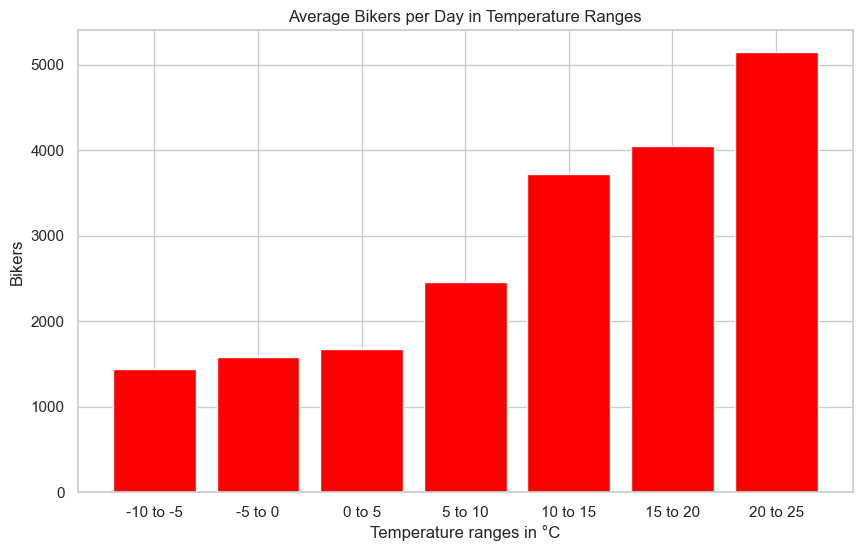

In [159]:
import matplotlib.pyplot as plt

x = ["-10 to -5", "-5 to 0", "0 to 5", "5 to 10", "10 to 15", "15 to 20", "20 to 25"]
y = list((d_avg["Total bikers"] / d_days["Date"]).round().astype(int))
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='red')
plt.xlabel("Temperature ranges in °C")
plt.ylabel("Bikers")
plt.title("Average Bikers per Day in Temperature Ranges")
plt.show()

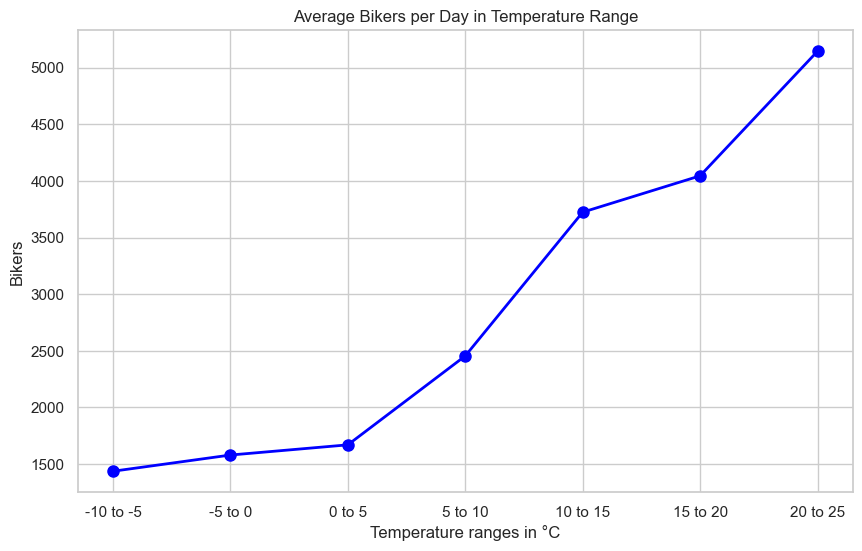

In [161]:
import matplotlib.pyplot as plt

x = ["-10 to -5", "-5 to 0", "0 to 5", "5 to 10", "10 to 15", "15 to 20", "20 to 25"]
y = list((d_avg["Total bikers"] / d_days["Date"]).astype(int))
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel("Temperature ranges in °C")
plt.ylabel("Bikers")
plt.title("Average Bikers per Day in Temperature Range")
plt.show()

## Interpretation

The resulting line chart illustrates a noticeable trend of increased bikers as temperatures rise. This supports the initial assumption that higher temperatures correlate with a greater number of bikers. The positive relationship between temperature and bikers suggests that weather conditions play a crucial role in influencing daily bicycle ridership in Munich.

##### Comparison of the months

To further illustrate this tendency. The amount of bikers for each month is been plotted in a bar char and directly compared to the average monthly temperature. Therefore, first, the combined dataset gets grouped by the column date:

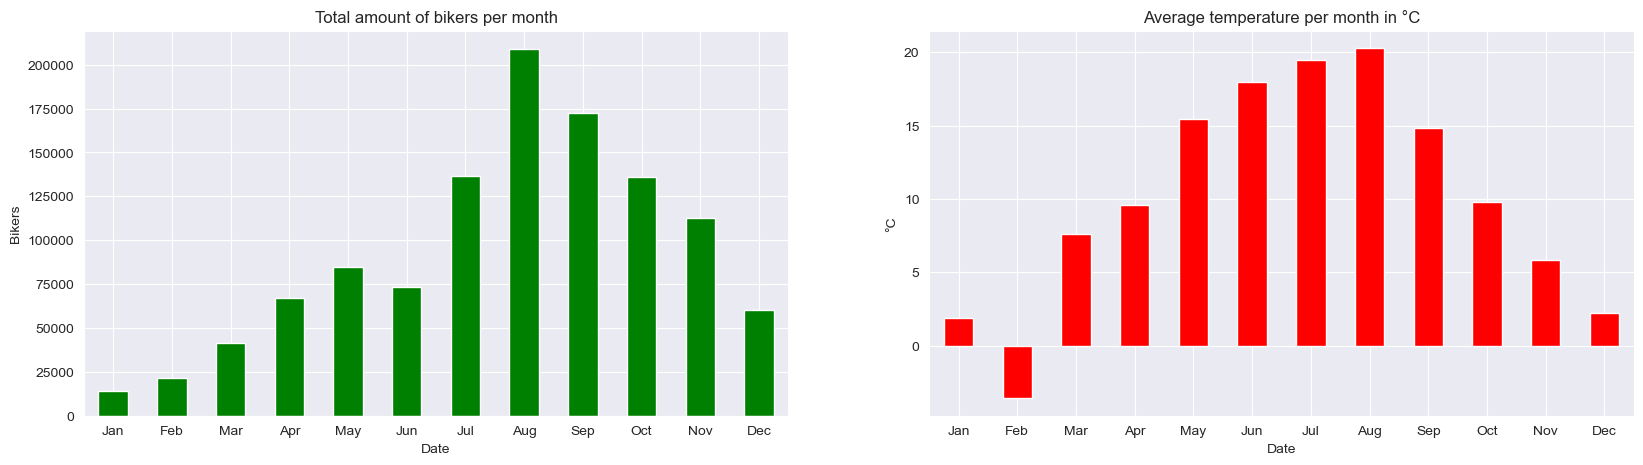

In [66]:
agg_cols_df1 = [col for col in df1.columns if col != 'Date']
agg_cols_df2 = [col for col in df2.columns if col != 'Date']
agg_dict_df1 = {col: 'sum' for col in agg_cols_df1}
agg_dict_df2 = {col: 'mean' for col in agg_cols_df2}
agg_dict = {**agg_dict_df1, **agg_dict_df2}
monthly_data = merged_df.groupby(pd.Grouper(key='Date', freq='M')).agg(agg_dict)
monthly_data.index = monthly_data.index.strftime('%b')
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
monthly_data['Total bikers'].plot(kind='bar', rot=0, color='green', ax=axes[0])
axes[0].set_ylabel("Bikers")
axes[0].set_title('Total amount of bikers per month')
monthly_data['Average temperature'].plot(kind='bar', rot=0, color='red', ax=axes[1])
axes[1].set_ylabel("°C")
axes[1].set_title('Average temperature per month in °C')
plt.show()

The visualizations reveal interesting insights into the correlation between weather conditions and urban bicycle ridership in Munich.

### Temperature and Bikers

The bar chart illustrating the average amount of bikers per day for different temperature ranges suggests a clear positive correlation. As temperatures rise, the number of bikers also increases. This aligns with the intuitive expectation that more people tend to cycle during warmer weather.

### Monthly Trends

Monthly trends further support the temperature-bikers correlation. The total amount of bikers per month shows a peak in warmer months, indicating a seasonal pattern in bicycle ridership. Additionally, the average temperature per month follows a similar trend, with higher temperatures in months with increased bike usage.

These findings can significantly inform the planning of bike paths in Munich. Urban planners and policymakers can use this information to anticipate and accommodate increased bicycle traffic during warmer seasons. Moreover, it emphasizes the importance of considering weather patterns when designing and optimizing urban cycling infrastructure.

#### Rain fall and the amount of Bikers

The next attribute, that will get inspected is the precipitation, called total rainfall in this project. Before going deeper into the analysis of the precipitation, it is expected, that high precipitation leads to less cyclist, while a lower precipitation creates the opposite. To check this assumption the following analysis is conducted.

In [68]:
rain_grouped = d.groupby(pd.cut(merged_df["Total rainfall"], np.arange(0.0, 100.0, 10.0), include_lowest=True)).agg({'Total bikers': 'sum', 'Date': 'count'})
rain_grouped

Total bikers  Date
Total rainfall                    
(-0.001, 10.0]     1024239.0   336
(10.0, 20.0]         63513.0    20
(20.0, 30.0]         27798.0     5
(30.0, 40.0]          9113.0     2
(40.0, 50.0]          4534.0     1
(50.0, 60.0]             0.0     0
(60.0, 70.0]             0.0     0
(70.0, 80.0]             0.0     0
(80.0, 90.0]             0.0     0

### Rainfall and Biker Analysis Summary
The analysis aimed to explore the relationship between total rainfall and the number of bikers in München. The process involved grouping total rainfall into intervals and calculating the sum of bikers and the count of days within each range. Here's a summary of the findings:

### Analysis Results
The table displays the sum of bikers and the count of days for each rainfall interval.

### Observations
An increase in rainfall generally corresponds to a decrease in the number of bikers.
The intervals with lower rainfall exhibit a higher count of bikers, suggesting a potential negative correlation.

### Insights
Weather conditions, specifically rainfall, can impact the daily bikers' count, influencing the choice of commuting modes.
This analysis provides a preliminary understanding of how rainfall might affect biking patterns in München. Further investigations and statistical measures can be employed to quantify and validate the observed trends.

### Rainfall and Biker Correlation:

1. Grouped total rainfall into 5mm intervals.
2. Calculated the total bikers and the number of days for each rainfall range.
3. Plotted a bar chart showing the average bikers per day for each rainfall range.
4. Identified a potential negative correlation between rainfall and the number of bikers.

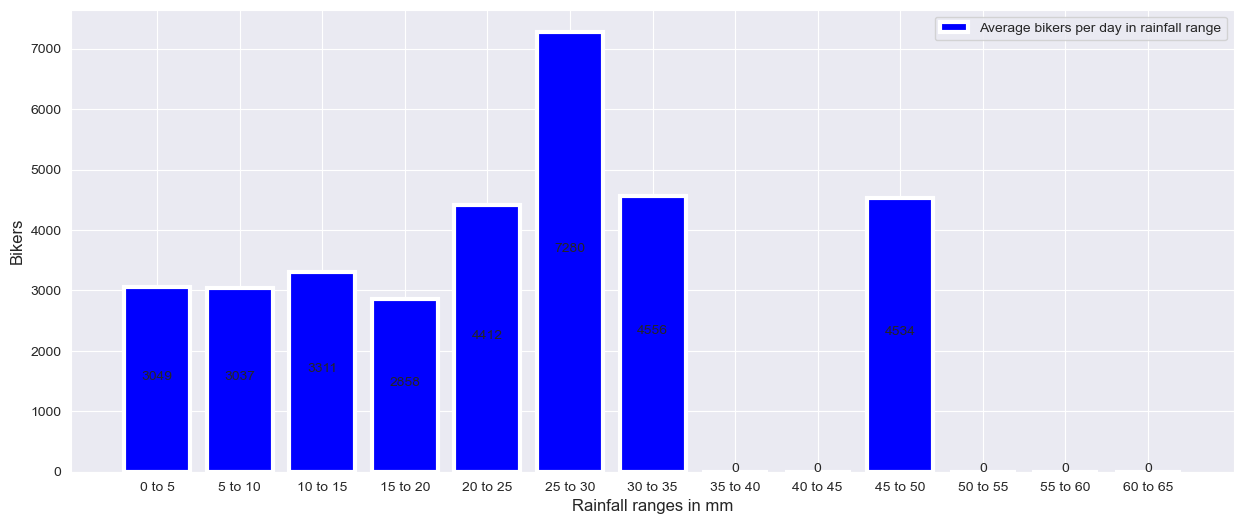

In [84]:
rain_grouped = d.groupby(pd.cut(merged_df["Total rainfall"], np.arange(0.0, 70.0, 5.0), include_lowest=True)).agg({'Total bikers': 'sum', 'Date': 'count'})
rain_grouped
rainfall_intervals = ["0 to 5", "5 to 10", "10 to 15", "15 to 20", "20 to 25", "25 to 30",
                      "30 to 35", "35 to 40", "40 to 45", "45 to 50", "50 to 55", "55 to 60", "60 to 65"]
average_bikers_per_day = [int(total_bikers / total_days) if total_days != 0 else 0
                           for total_bikers, total_days in zip(rain_grouped["Total bikers"], rain_grouped["Date"])]
plt.figure(figsize=(15, 6))
plt.bar(rainfall_intervals, average_bikers_per_day, label="Average bikers per day in rainfall range", color='blue', linewidth=3)
plt.xlabel("Rainfall ranges in mm", fontsize=12)
plt.ylabel("Bikers", fontsize=12)
plt.legend()
for i in range(len(rainfall_intervals)):
    plt.text(i, average_bikers_per_day[i] / 2, str(average_bikers_per_day[i]), ha='center')
plt.show()



Overall, the analysis provides valuable insights into the relationship between weather conditions and bike usage, showcasing temperature's positive impact and suggesting rainfall's potential negative influence on the number of bikers.

##### Comparison of the month

This visualization allows you to compare the monthly variation in both the total bikers and precipitation, helping to identify potential patterns or correlations.

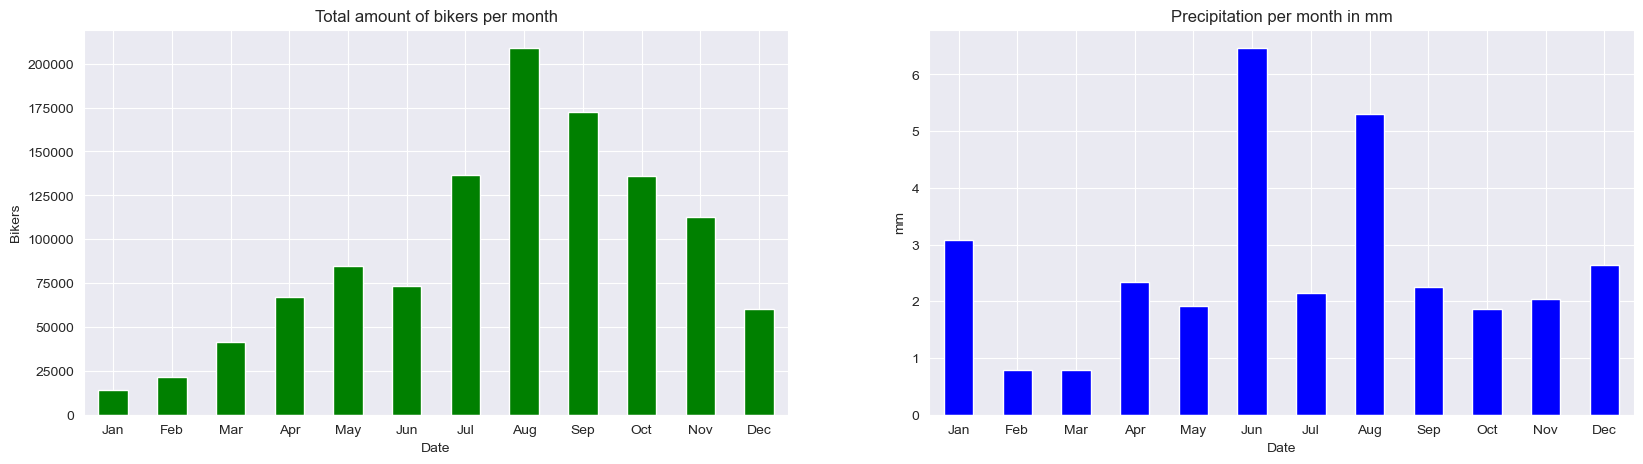

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))  # 1 row, 2 columns
dg['Total bikers'].plot(kind='bar', rot=0, color='green', ax=ax1)
ax1.set_ylabel("Bikers")
ax1.set_title('Total amount of bikers per month')
dg['Total rainfall'].plot(kind='bar', rot=0, color='blue', ax=ax2)
ax2.set_ylabel("mm")
ax2.set_title('Precipitation per month in mm')
plt.show()

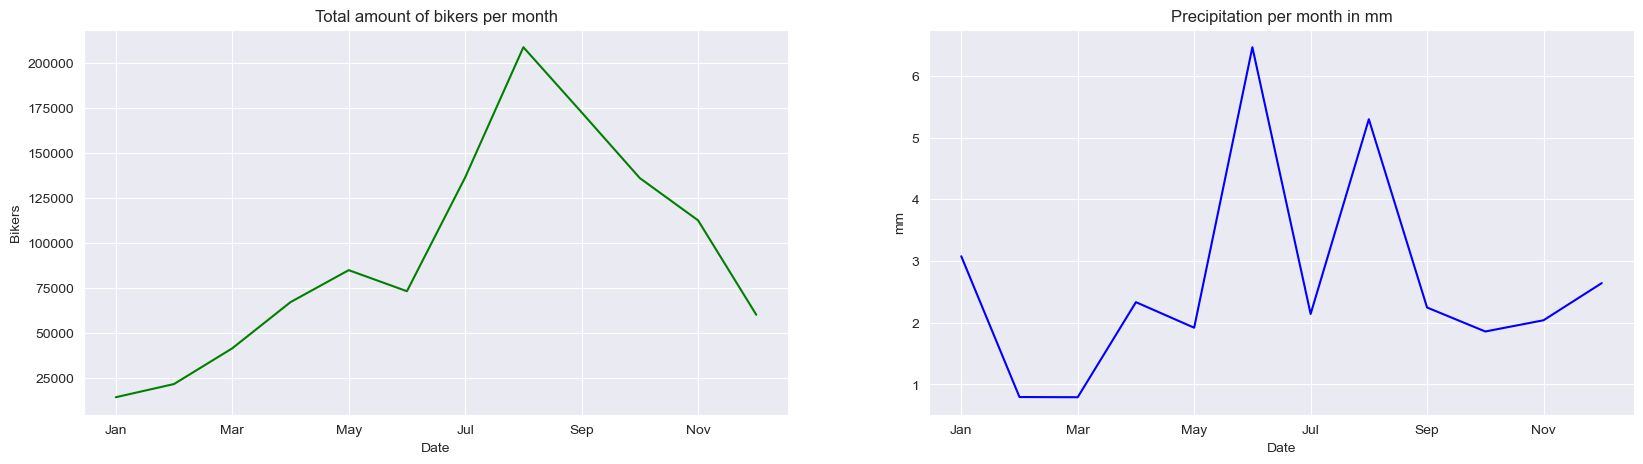

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
dg['Total bikers'].plot(rot=0, color='green', ax=ax1)
ax1.set_ylabel("Bikers")
ax1.set_title('Total amount of bikers per month')
dg['Total rainfall'].plot(rot=0, color='blue', ax=ax2)
ax2.set_ylabel("mm")
ax2.set_title('Precipitation per month in mm')
plt.show()

The data does not indicate a significant correlation between precipitation and the number of bikers. The assumption that higher cyclist presence corresponds to lower precipitation, and vice versa, cannot be substantiated based on the observed patterns in the dataset.

#### Duration of sunshine and the amount of bikers

The attribute, we are looking into is the duration of sunshine. This attribute is expected to have a significant influence on the amount of cyclists. In the following analysis, I want to proof, that days with a higher average duration of sunshine, will lead to more people using a bicycle.

##### Grouping the duration of sunshine

Similar to the precipitation and the average temperature, the analysis consists of two steps. First the duration of sunshine is grouped into ranges of 50 minutes starting with zero minutes and going up till 950 minutes per day.

In [88]:
d_sun = d.groupby(pd.cut(merged_df["Duration of sunshine"], np.arange(0.0, 1000.0, 50.0),include_lowest=True)).sum(numeric_only=True)
d_days_sun = d.groupby(pd.cut(merged_df["Duration of sunshine"], np.arange(0.0, 1000.0, 50.0),include_lowest=True)).count()
d_sun[["Total bikers"]].join(d_days_sun[["Date"]])

Total bikers  Date
Duration of sunshine                    
(-0.001, 50.0]            242698.0    98
(50.0, 100.0]              85620.0    29
(100.0, 150.0]             53270.0    17
(150.0, 200.0]             53319.0    15
(200.0, 250.0]             21109.0     7
(250.0, 300.0]             71781.0    25
(300.0, 350.0]             49114.0    17
(350.0, 400.0]             49608.0    18
(400.0, 450.0]             53844.0    15
(450.0, 500.0]             42215.0    17
(500.0, 550.0]             64720.0    20
(550.0, 600.0]             73588.0    16
(600.0, 650.0]             60460.0    15
(650.0, 700.0]             58636.0    17
(700.0, 750.0]             61489.0    15
(750.0, 800.0]             27476.0     7
(800.0, 850.0]             48407.0    10
(850.0, 900.0]              5742.0     3
(900.0, 950.0]              6101.0     3

The following plot shows the average amount of bikers per day for differen levels of sunshine-duration.

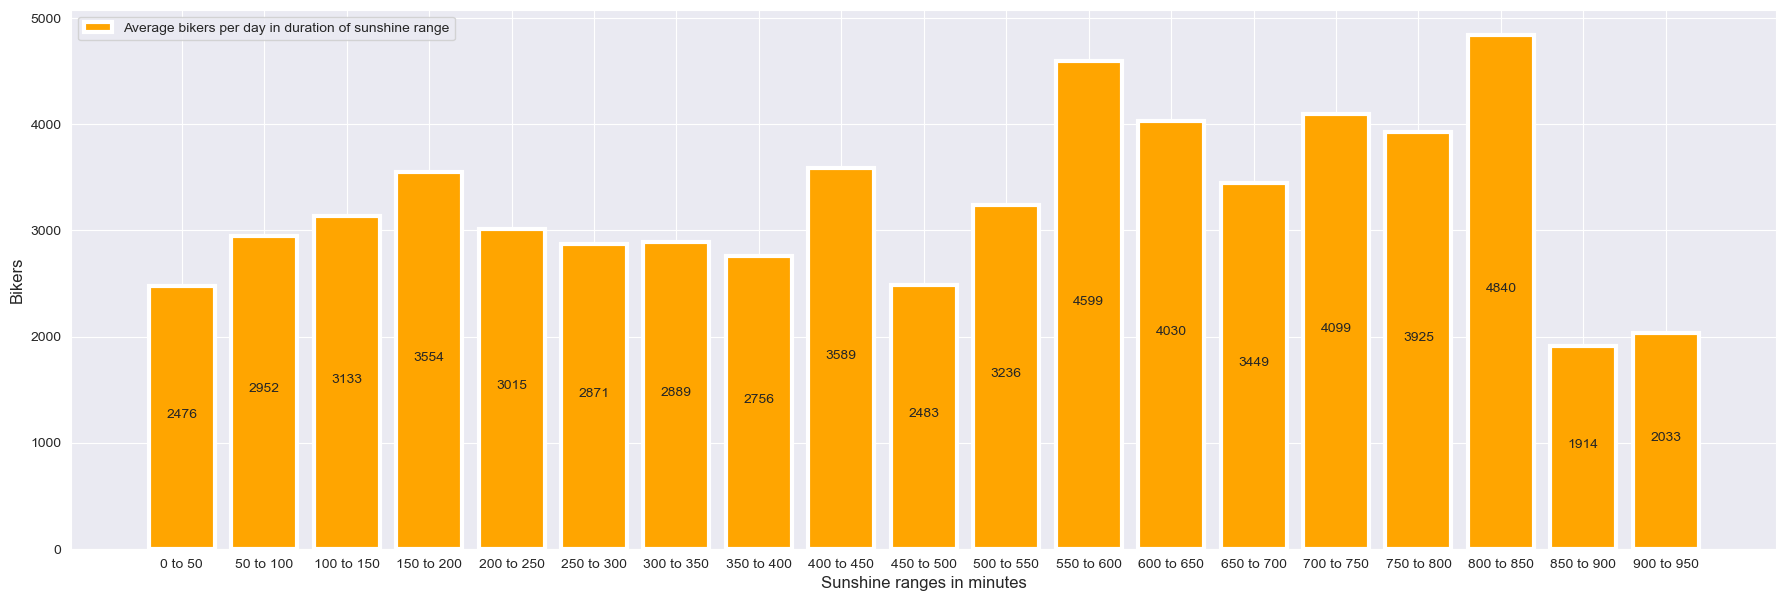

In [89]:
import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/2, str(y[i]), ha = 'center')

x = ["0 to 50", "50 to 100", "100 to 150", "150 to 200", "200 to 250", "250 to 300", "300 to 350", "350 to 400", "400 to 450",
     "450 to 500", "500 to 550", "550 to 600", "600 to 650", "650 to 700","700 to 750", "750 to 800", "800 to 850", "850 to 900", "900 to 950"]

y = list((d_sun["Total bikers"] / d_days_sun["Date"]).astype(int))
plt.figure(figsize=(22,7))
plt.bar(x, y, label="Average bikers per day in duration of sunshine range", color='orange', linewidth = 3)
plt.xlabel("Sunshine ranges in minutes",fontsize=12)
plt.ylabel("Bikers",fontsize=12)
plt.legend()
addlabels(x, y)

Except for a duration between 800 minutes and 850 minutes, an tendency can be seen. The higher the amount of sunshine per day, the more people are using their bikes. 

##### Comparison of the months

To further undermine the assumption a comparison of the month is created in the following.

Text(0.5, 1.0, 'Duration of sunshine per month in minutes')

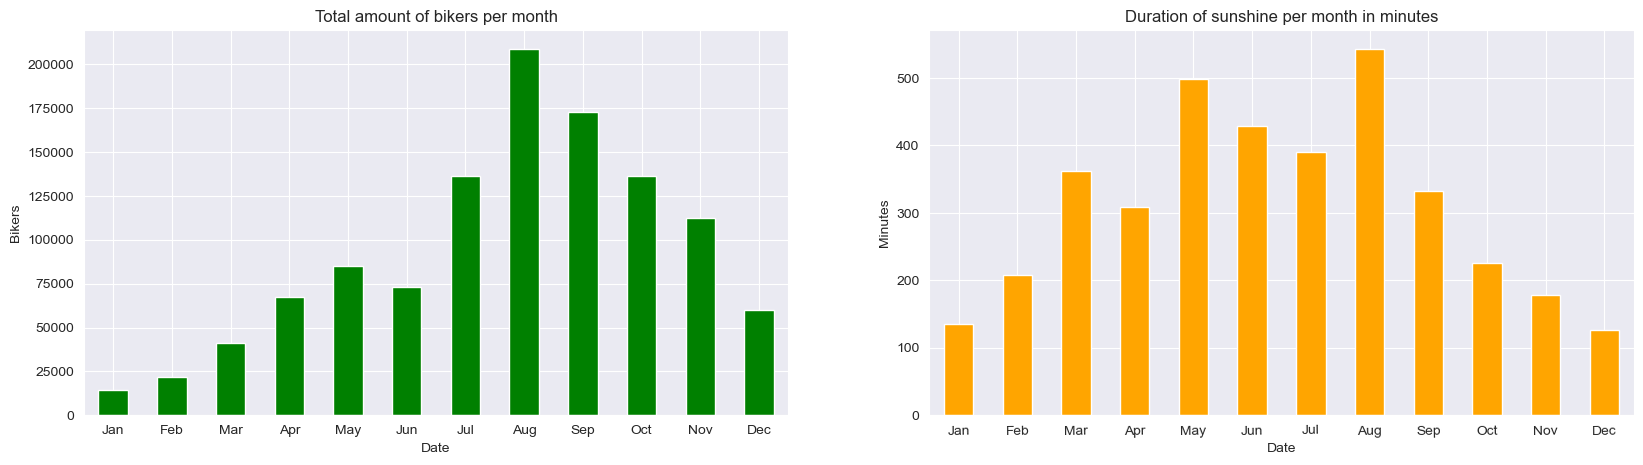

In [90]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))  # 1 row, 2 columns
dg['Total bikers'].plot.bar(rot=0, color="green", figsize=(20,5), ax=ax1)
dg['Duration of sunshine'].plot.bar(rot=1, color="orange", figsize=(20,5), ax=ax2)
ax1.set_ylabel("Bikers")
ax2.set_ylabel("Minutes")
ax1.set_title('Total amount of bikers per month')
ax2.set_title('Duration of sunshine per month in minutes')

Text(0.5, 1.0, 'Duration of sunshine per month in minutes')

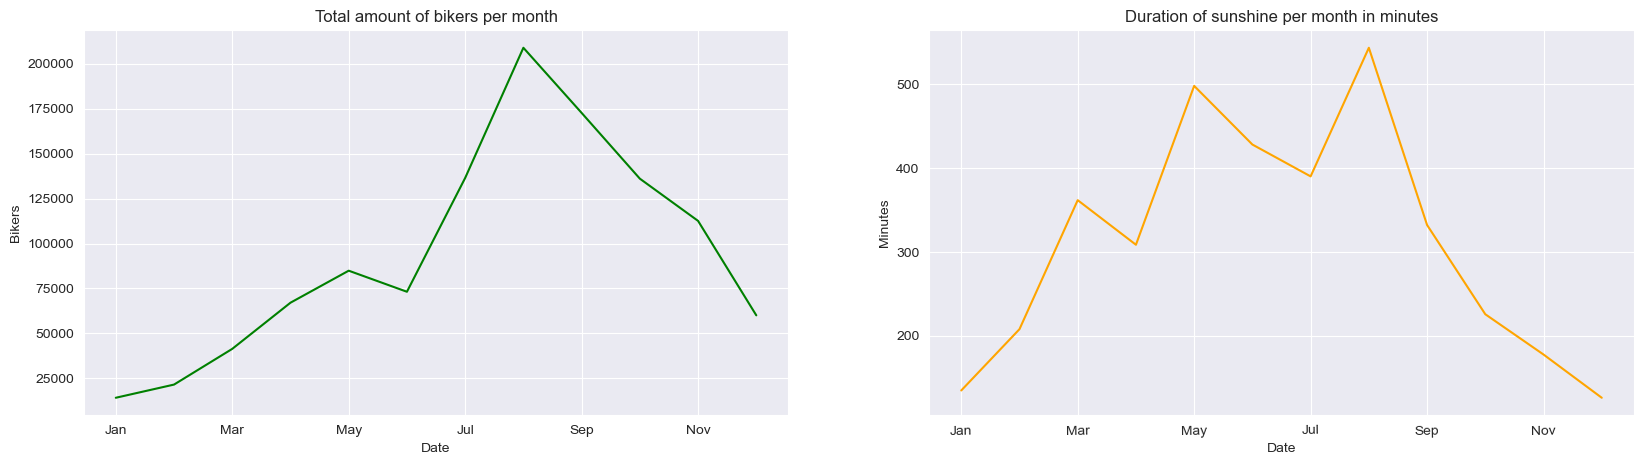

In [91]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))  # 1 row, 2 columns
dg['Total bikers'].plot(rot=0, color="green", figsize=(20,5), ax=ax1)
dg['Duration of sunshine'].plot(rot=1, color="orange", figsize=(20,5), ax=ax2)
ax1.set_ylabel("Bikers")
ax2.set_ylabel("Minutes")
ax1.set_title('Total amount of bikers per month')
ax2.set_title('Duration of sunshine per month in minutes')

#### Snow level and the amount of Bikers

##### Grouping the Snow level
Here the same procedure for the snow level, Therefore ranges of each 20 mm between 0 mm and 200 mm get created. 
then the amount of bikers and the amount of days to each range get calculated:

In [97]:
d_snow = d.groupby(pd.cut(merged_df["Snow-level"], np.arange(0.0, 200.0, 20.0),include_lowest=True)).sum(numeric_only=True)
d_days_snow = d.groupby(pd.cut(merged_df["Snow-level"], np.arange(0.0, 200.0, 20.0),include_lowest=True)).count()
d_snow[["Total bikers"]].join(d_days_snow[["Date"]])

Total bikers  Date
Snow-level                        
(-0.001, 20.0]     1085271.0   323
(20.0, 40.0]          9752.0    14
(40.0, 60.0]          6026.0     8
(60.0, 80.0]          5969.0     5
(80.0, 100.0]         2026.0     3
(100.0, 120.0]        4002.0     3
(120.0, 140.0]        6507.0     2
(140.0, 160.0]        7848.0     4
(160.0, 180.0]         830.0     1

##### The following plot shows the average amount of bikers per day for different levels of snow

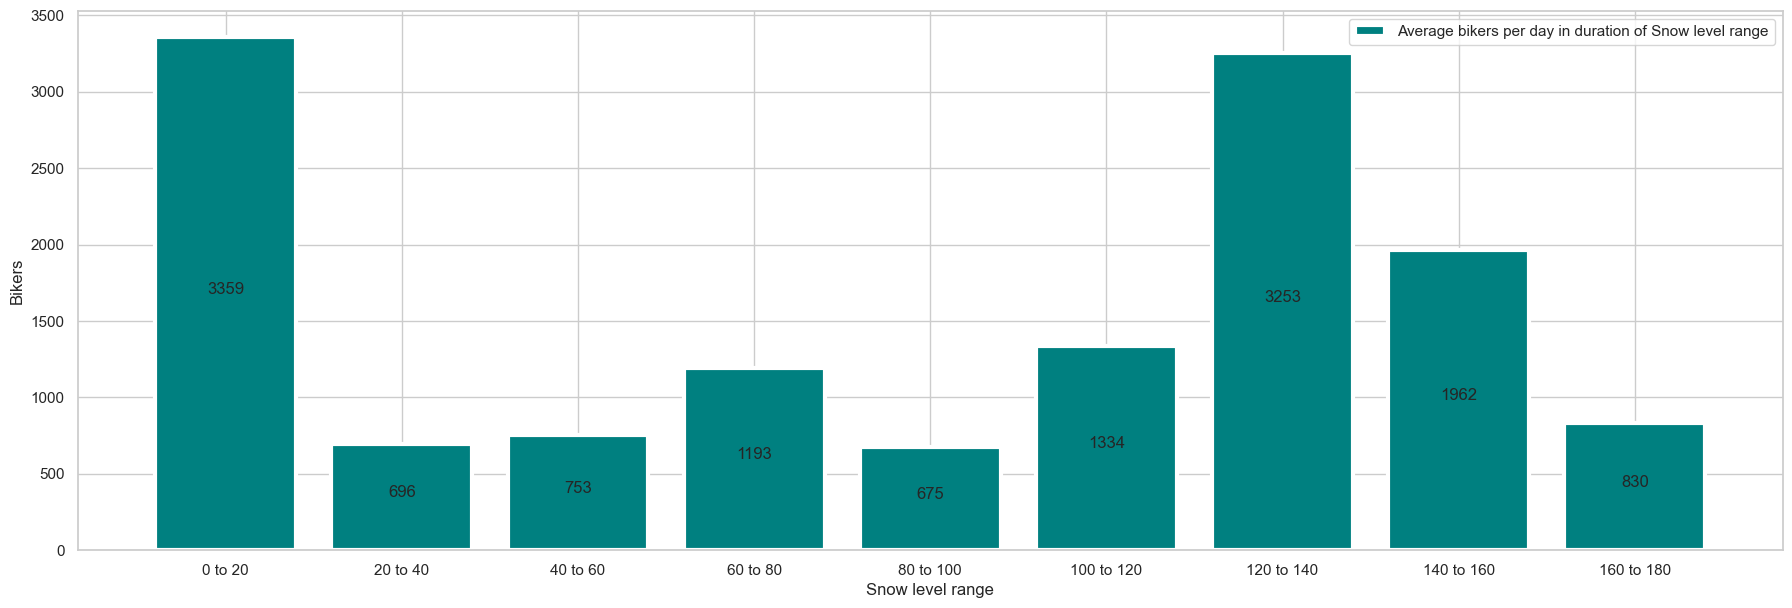

In [167]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/2, str(y[i]), ha = 'center')

x = ["0 to 20", "20 to 40", "40 to 60", "60 to 80","80 to 100", "100 to 120", "120 to 140", "140 to 160", "160 to 180"]
y = list((d_snow["Total bikers"] / d_days_snow["Date"]).astype(int))
plt.figure(figsize=(22,7))
plt.bar(x, y, label="Average bikers per day in duration of Snow level range", color='teal', linewidth = 3)
plt.xlabel("Snow level range",fontsize=12)
plt.ylabel("Bikers",fontsize=12)
plt.legend()
addlabels(x, y)

##### Comparison of the months
To further undermine the assumption a comparison of the month is created in the following

Text(0.5, 1.0, 'Duration of Snow level per month')

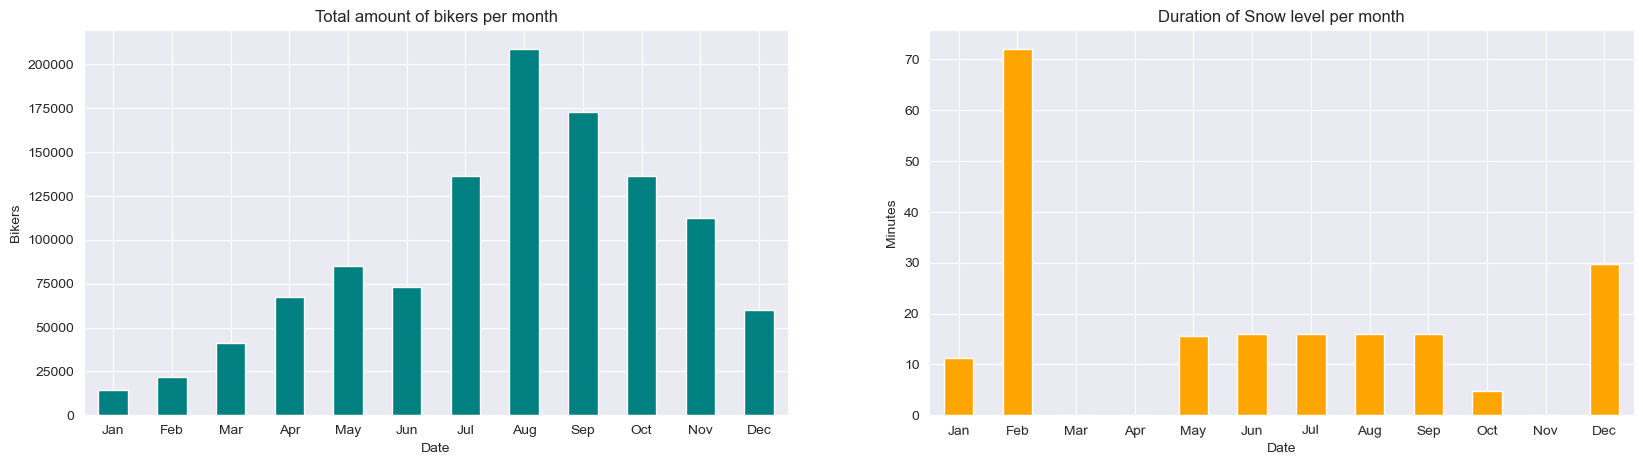

In [98]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))
dg['Total bikers'].plot.bar(rot=0, color="teal", figsize=(20,5), ax=ax1)
dg['Snow-level'].plot.bar(rot=1, color="orange", figsize=(20,5), ax=ax2)
ax1.set_ylabel("Bikers")
ax2.set_ylabel("Minutes")
ax1.set_title('Total amount of bikers per month')
ax2.set_title('Duration of Snow level per month')

Text(0.5, 1.0, 'Duration of Snow level per month')

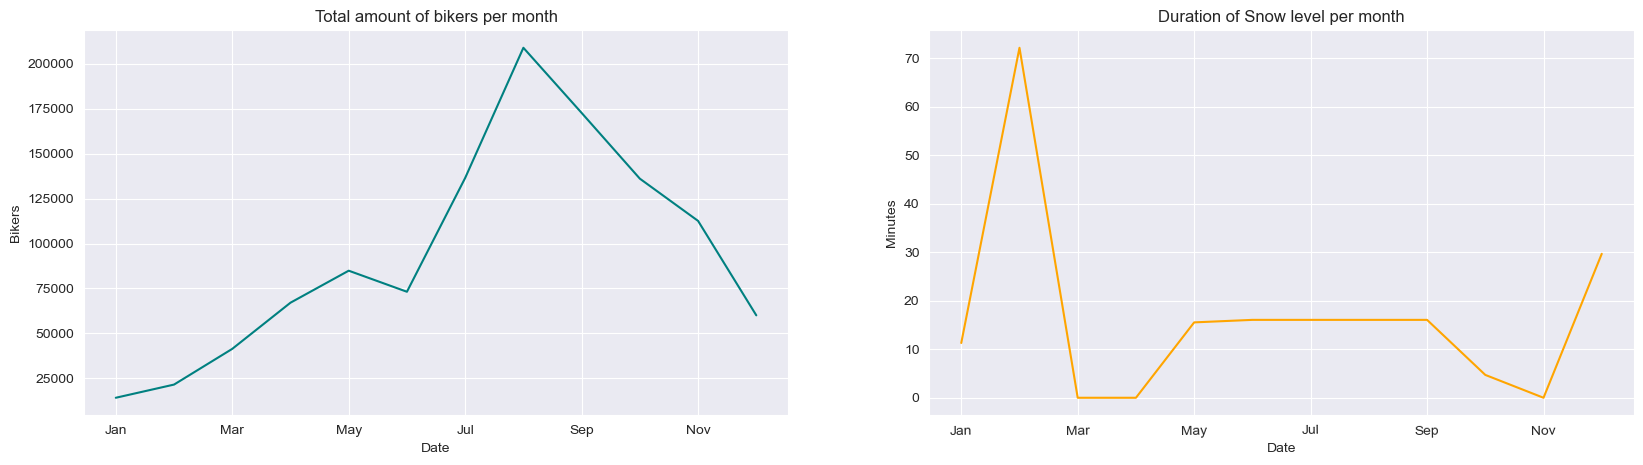

In [99]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))
dg['Total bikers'].plot(rot=0, color="teal", figsize=(20,5), ax=ax1)
dg['Snow-level'].plot(rot=1, color="orange", figsize=(20,5), ax=ax2)
ax1.set_ylabel("Bikers")
ax2.set_ylabel("Minutes")
ax1.set_title('Total amount of bikers per month')
ax2.set_title('Duration of Snow level per month')

##### There are some parallels between the two plotted bar charts. Especially in colder month.

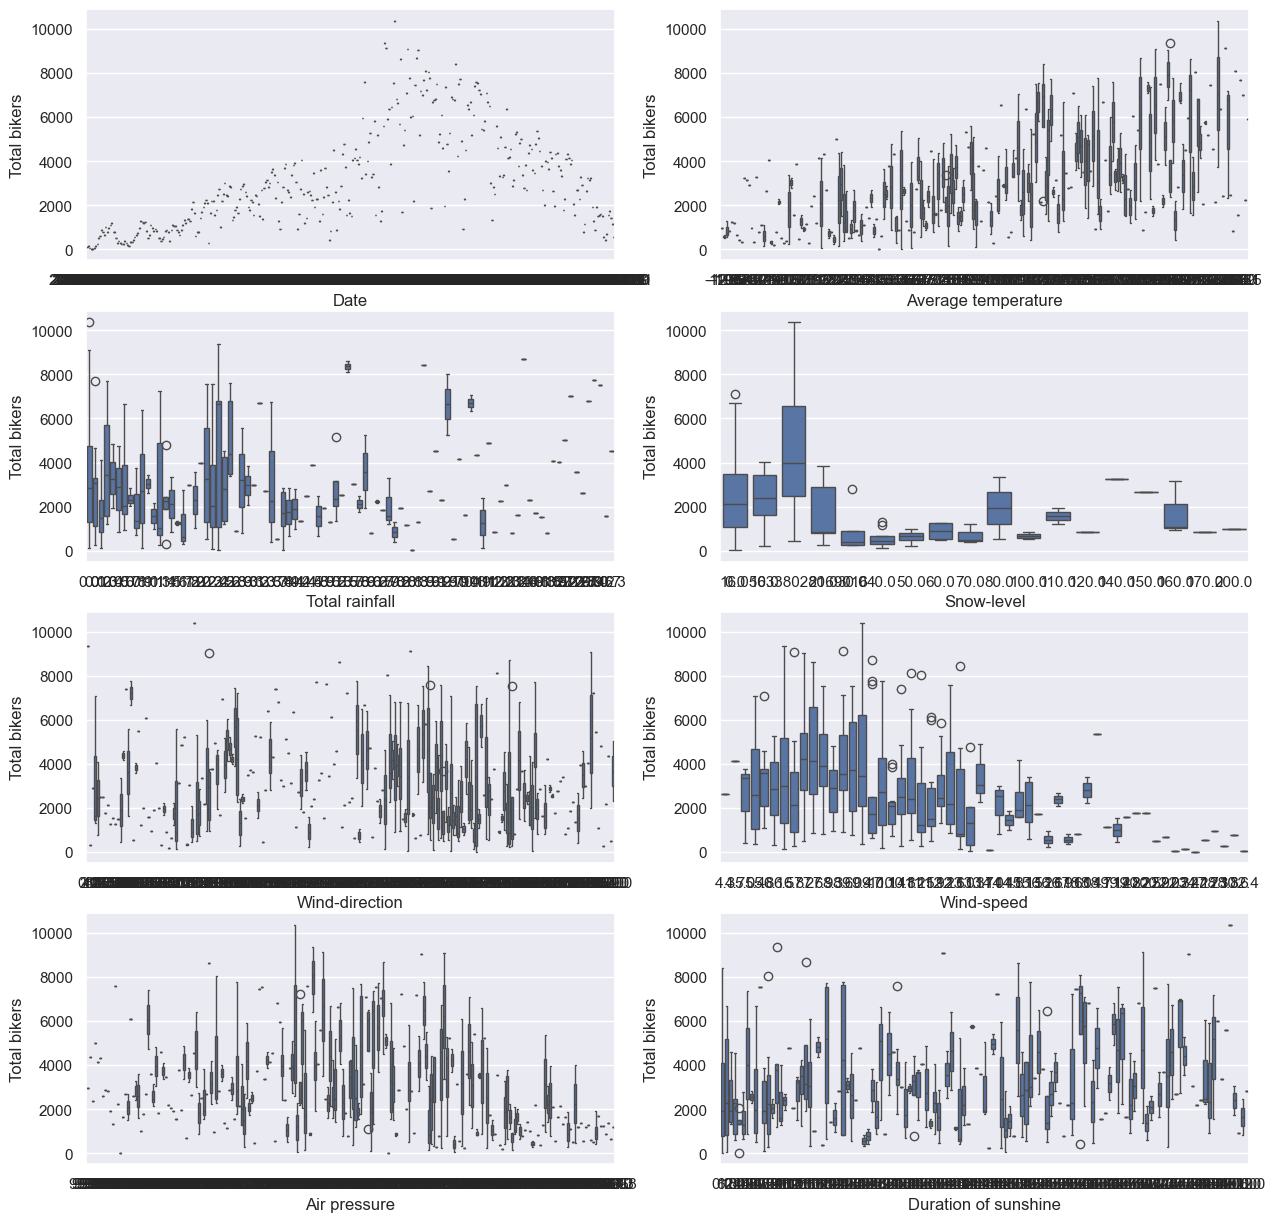

In [100]:
bike_cat_col = ['Date','Average temperature','Total rainfall','Snow-level','Wind-direction','Wind-speed','Air pressure','Duration of sunshine']
plt.figure(figsize=(15, 15))

sns.set(style="darkgrid")
i=1
for col in bike_cat_col:
    plt.subplot(4,2,i)
    sns.boxplot(data=merged_df, x=col, y='Total bikers')
    i=i+1
plt.show()

#### Multivariate Analysis

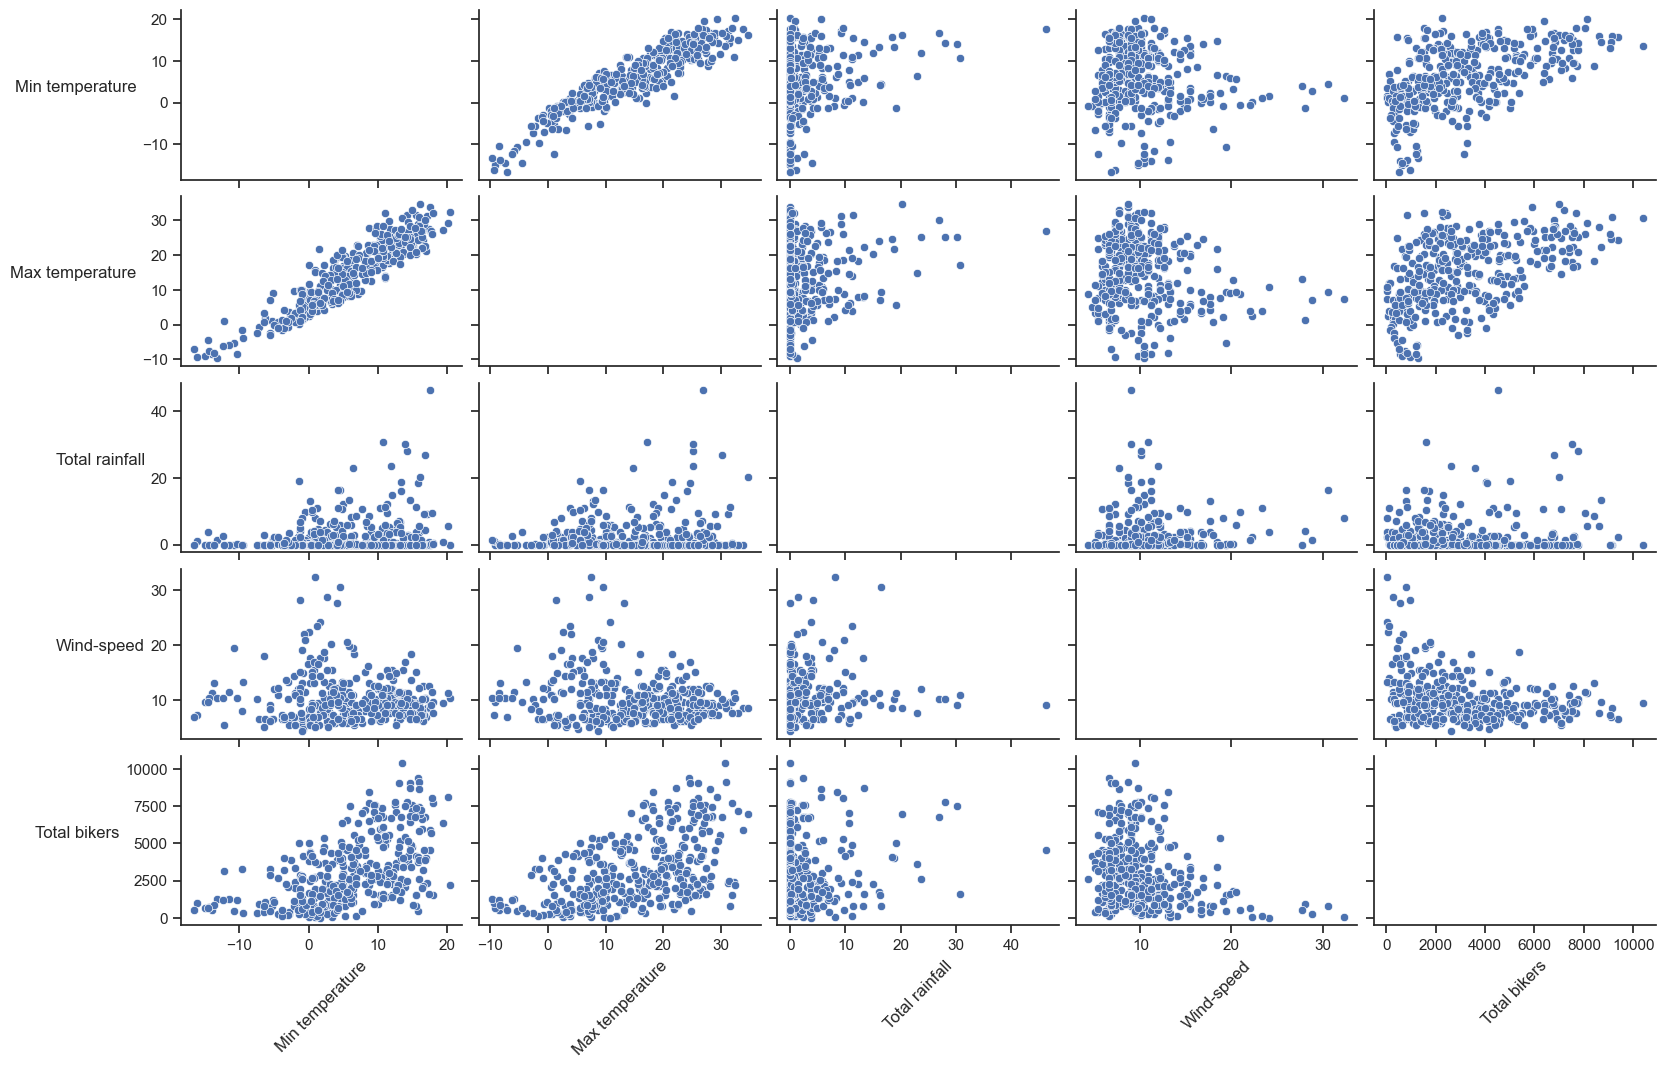

In [171]:
data = merged_df[['Min temperature', 'Max temperature', 'Total rainfall', 'Wind-speed', 'Total bikers']]

sns.set(style="ticks")
scatter_matrix = sns.pairplot(data, diag_kind='box', height=2, aspect=1.6)

for ax in scatter_matrix.axes.flat:
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

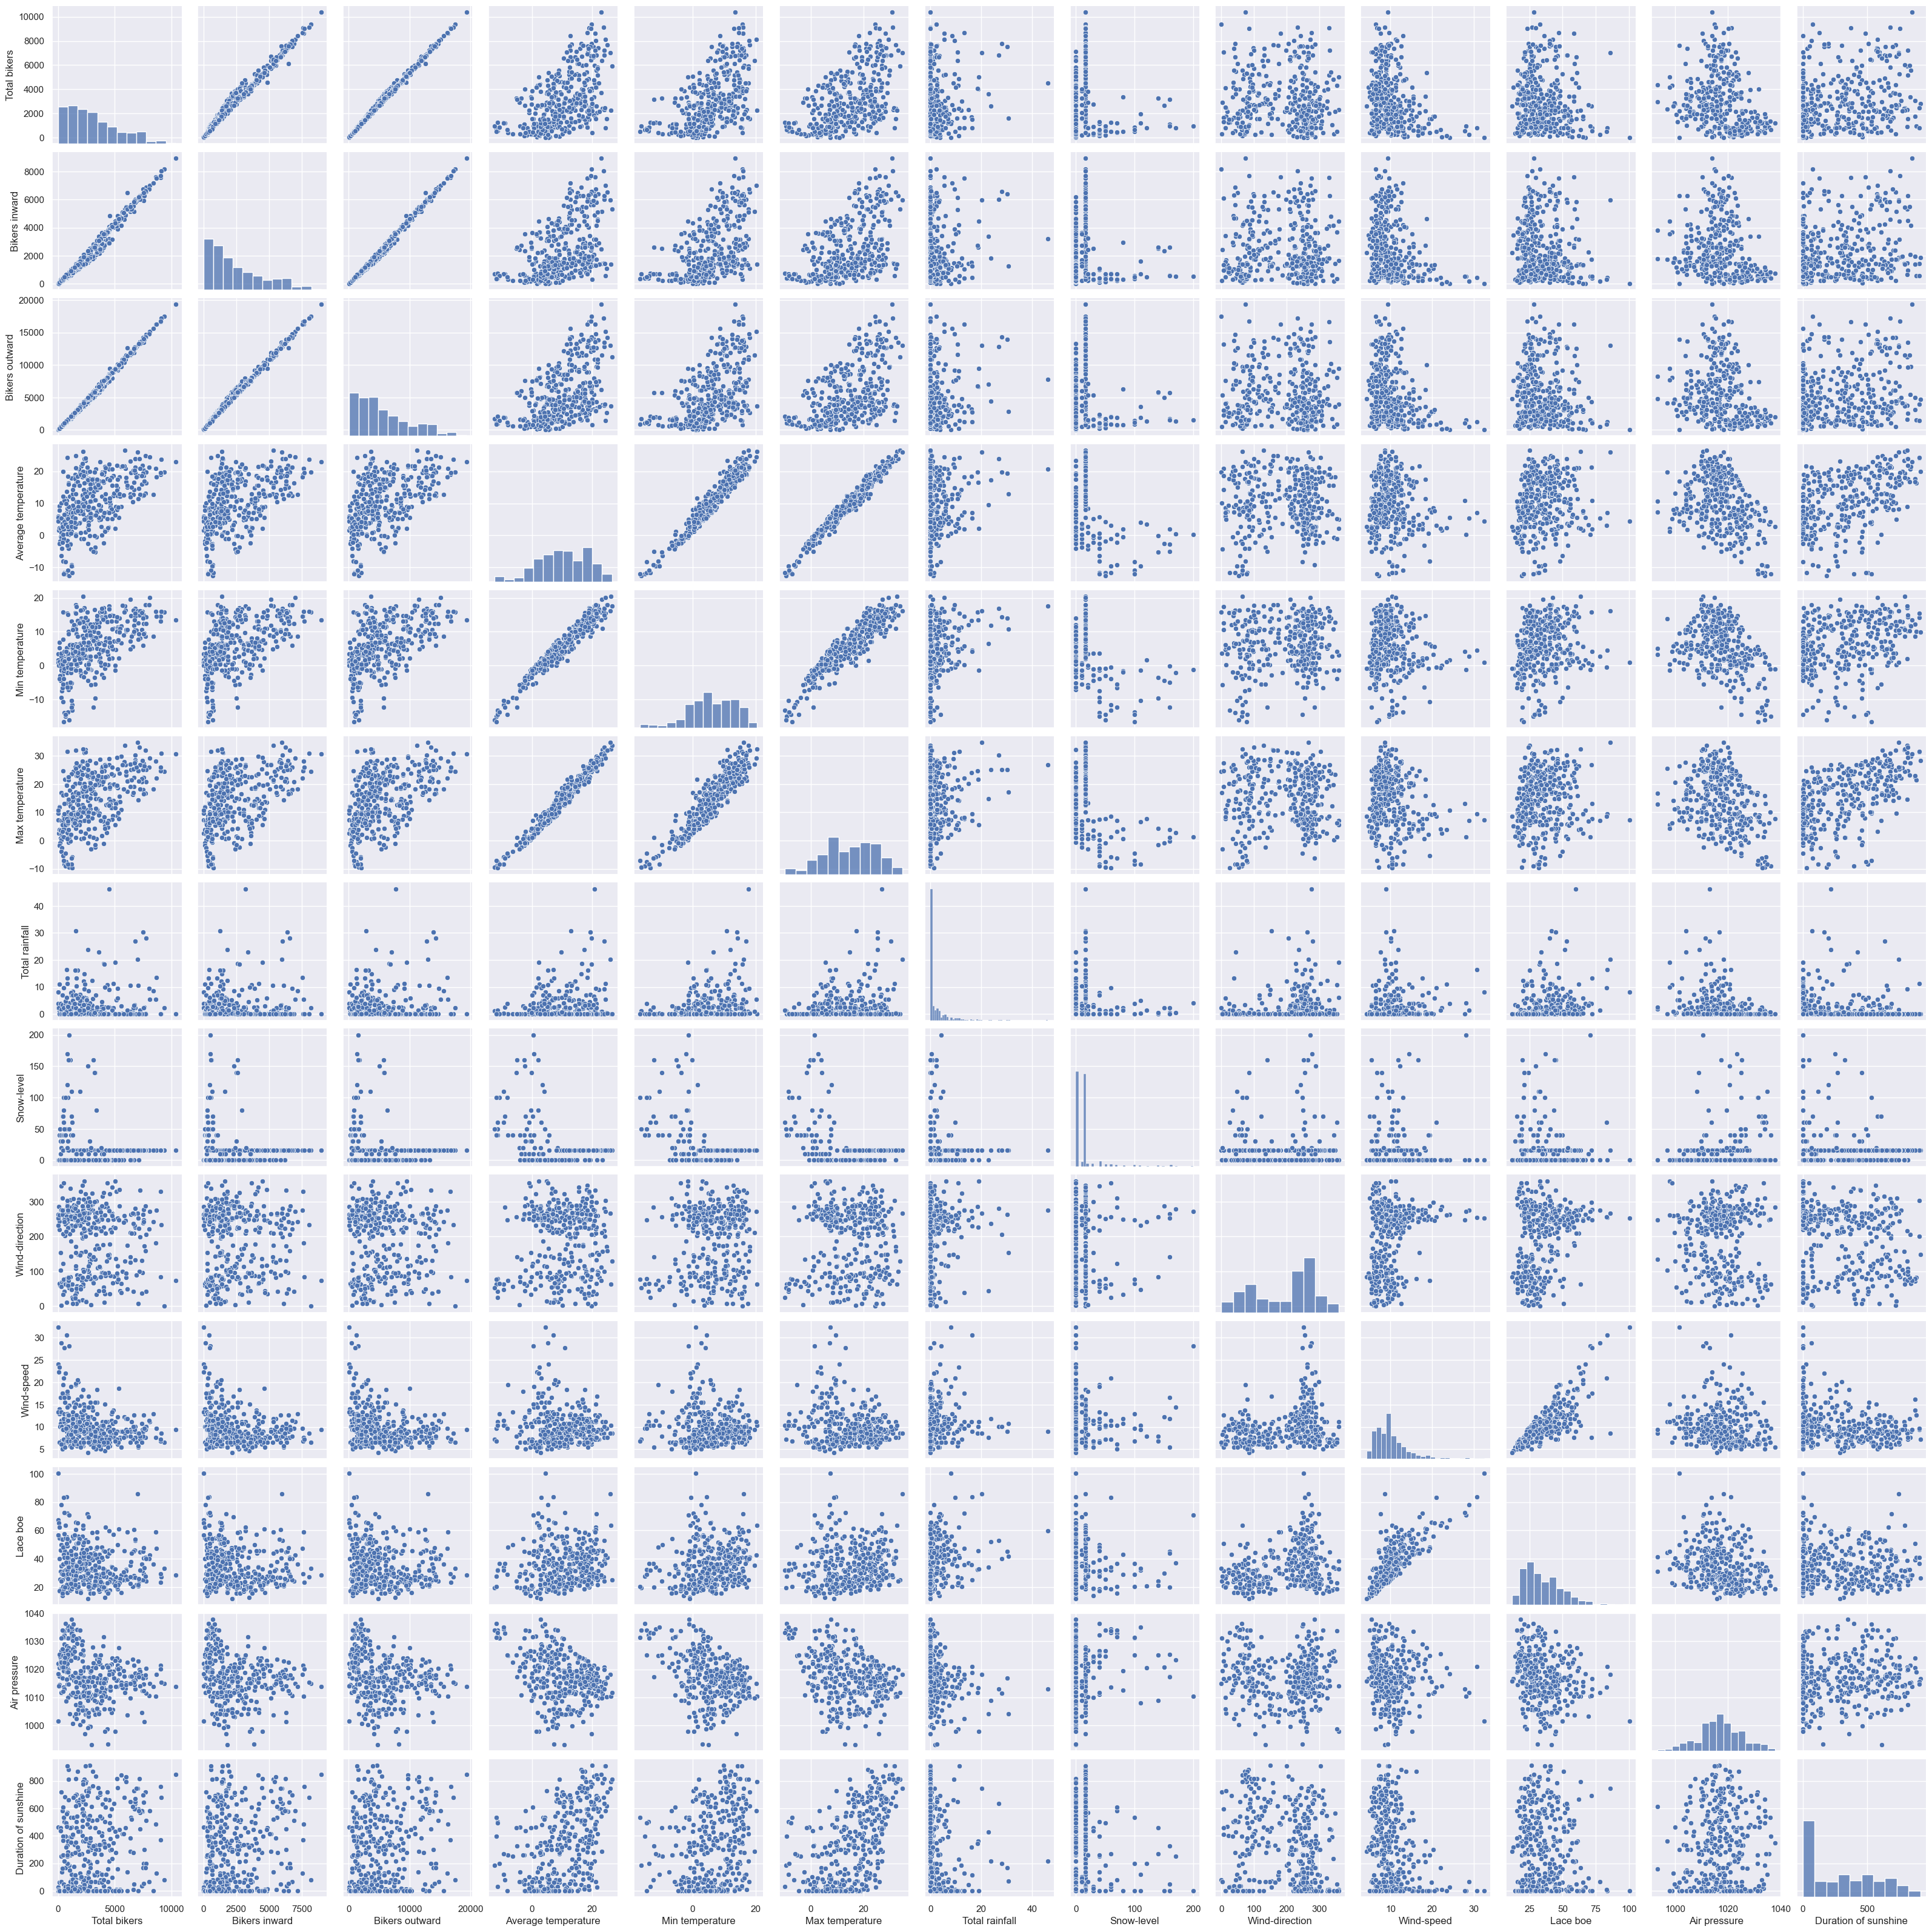

In [108]:
sns.pairplot(merged_df)
plt.show()

<Figure size 3000x4000 with 0 Axes>

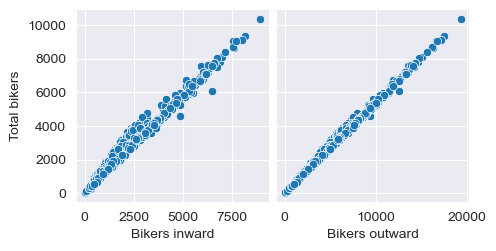

In [94]:
plt.figure(figsize=(30,40))
sns.pairplot(merged_df,x_vars=("Bikers inward","Bikers outward"),y_vars="Total bikers")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


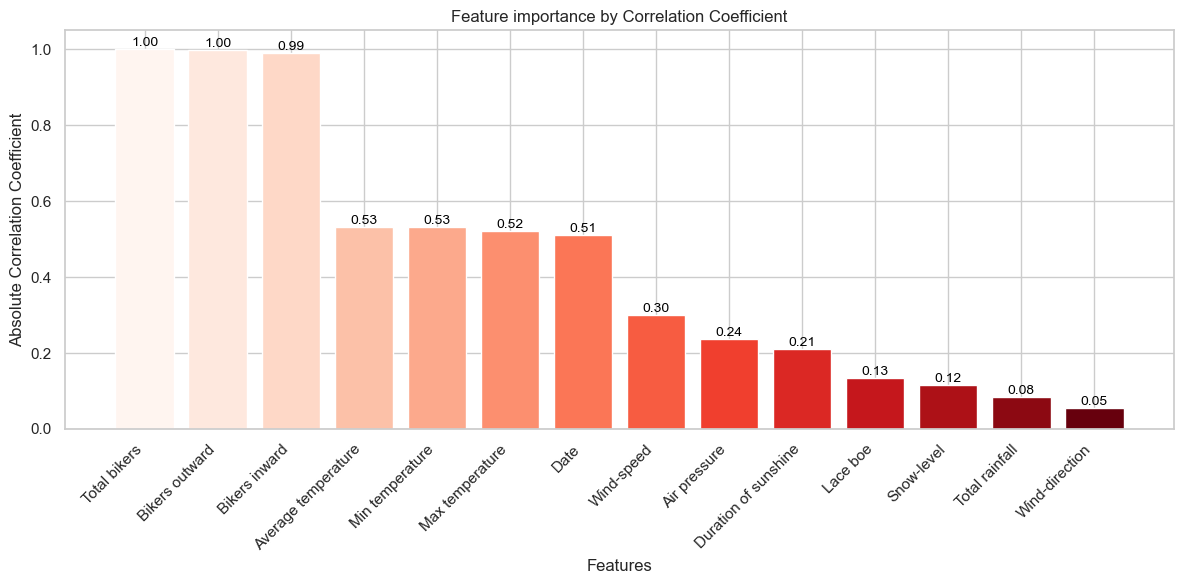

In [165]:
corr_values = merged_df.corr().loc['Total bikers', :].apply(lambda x: abs(x)).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
bars = plt.bar(corr_values.index, corr_values.values, color=plt.cm.Reds(np.linspace(0, 1, len(corr_values))))
plt.xlabel("Features")
plt.ylabel("Absolute Correlation Coefficient")
plt.title("Feature importance by Correlation Coefficient")
plt.xticks(rotation=45, ha="right")
for bar, value in zip(bars, corr_values.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.2f}",
             ha='center', va='bottom', color='black', fontsize=10)

plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

## 3. Conclusion

The analysis of the datasets revealed several insights into the factors influencing the number of bikers. Here are the key findings:

### 3.1 Temperature and Biking Activity

There is a clear positive correlation between temperature and the number of bikers.
Warmer temperatures generally lead to an increase in biking activity.

### 3.2 Rainfall and Biking Activity

Contrary to expectations, there is no significant correlation between precipitation and the number of bikers.
Biking activity seems to persist even in rainy conditions.

### 3.3 Multivariate Relationships

Multivariate analysis did not reveal strong correlations between biking activity and other weather-related factors such as wind speed.

## 4. Findings:

### 4.1 Temperature Influence

Biking activity is highly influenced by temperature, with a noticeable increase in warmer conditions.
The average amount of bikers per day rises as temperatures increase.

### 4.2 Rainfall Impact

Surprisingly, rainfall does not exhibit a clear relationship with the number of bikers.
Cyclists are still active even on rainy days, challenging the assumption that precipitation negatively affects biking.

### 4.3 Multivariate Complexity

Exploring multiple factors like minimum temperature, maximum temperature, rainfall, wind speed, and total bikers revealed no strong interdependence.

## 5. Outlook

### 5.1. Further Analysis

Explore additional variables that might influence biking patterns, such as public events, holidays, or special promotions.

### 5.2 Temporal Patterns

Analyze temporal patterns, including daily and hourly trends, to uncover specific time periods of increased biking activity.

## 6. Problem

### 6.1 Inconsistency in Precipitation Impact

- The lack of a consistent correlation between precipitation and biking activity raises questions about the specific conditions under which cyclists choose to ride despite adverse weather.

In summary, while temperature demonstrates a clear impact on biking activity, further investigation is needed to understand the nuanced relationship between precipitation and biking patterns.
The findings provide a foundation for refining assumptions and conducting more detailed analyses to enhance our understanding of biking behavior in different weather conditions.
